In [2]:
######################################################################################
# Using Electrodermal Activity to Detect Deception and Suspicion during a Card Game
# Affective Computing - Mini-project
# Jan Ondras
# Dec 2017 - Jan 2018
######################################################################################
# SUSPICION detection
# Tune parameters on the whole dataset - using LOSO
######################################################################################
    
import itertools
import numpy as np
import glob
import csv
import time
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score

seed1 = 23
seed2 = 889
seed3 = 43
int_SIDs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
SIDs = ['{:02d}'.format(s) for s in int_SIDs]
C_range = 2. ** np.arange(-30, 15, step=1.)
parameters = [{'C': C_range}]

eds = np.linspace(1.,4.,7) # Epoch delay
msels = np.linspace(0.5,4.5,9) # Max suspicion epoch length
feature_type = 'suspicion'
val_scores = []  # for each subject(key), list of tuples (ed,msel,bestC,outer_fold, val_acc)

for i, ed in enumerate(eds):
    for j, msel in enumerate(msels):
        for C in C_range:

            t = time.time()
            data = np.loadtxt('./../Experiment/ExtractedFeatures/features_'+feature_type+'_u_'+str(i)+'_'+str(j)+'.csv', 
                              delimiter=",", skiprows=0, dtype=str)   
            SIDs_all = data[:,0]
            X = data[:,1:-2].astype(np.float32)
            y = data[:,-1].astype(np.int)

            r = []
            # Outer CV - 2 min
            for SID in SIDs:
    #             print "Subject ", SID, ": "
                X_test = np.array([features for subject, features in zip(SIDs_all, X) if subject == SID])
                y_test = np.array([label for subject, label in zip(SIDs_all, y) if subject == SID])
                X_train = np.array([features for subject, features in zip(SIDs_all, X) if subject != SID])
                y_train = np.array([label for subject, label in zip(SIDs_all, y) if subject != SID])
                # Balance the dataset
                X_train, y_train = RandomOverSampler(ratio='minority', random_state=seed1).fit_sample(X_train, y_train)
                X_test, y_test = RandomOverSampler(ratio='minority', random_state=seed1).fit_sample(X_test, y_test)

                clf = LinearSVC(C=C)
                clf.fit(X_train, y_train)
                r.append( accuracy_score(y_test, clf.predict(X_test)) )

            val_scores.append( (ed, msel, C, np.mean(r)) )
#             print time.time()-t
print val_scores

KeyboardInterrupt: 

Max val acc:  0.621400458732 at (3.0, 3.5, 0.03125, 0.6214004587317844)


<IPython.core.display.Javascript object>


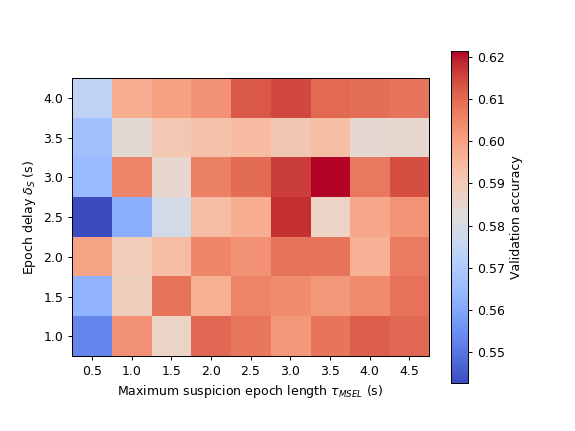

In [17]:
# Saved scores from above
val_scores = [(1.0, 0.5, 9.3132257461547852e-10, 0.5), (1.0, 0.5, 1.862645149230957e-09, 0.5), (1.0, 0.5, 3.7252902984619141e-09, 0.5), (1.0, 0.5, 7.4505805969238281e-09, 0.5), (1.0, 0.5, 1.4901161193847656e-08, 0.5), (1.0, 0.5, 2.9802322387695312e-08, 0.5), (1.0, 0.5, 5.9604644775390625e-08, 0.5), (1.0, 0.5, 1.1920928955078125e-07, 0.5), (1.0, 0.5, 2.384185791015625e-07, 0.5), (1.0, 0.5, 4.76837158203125e-07, 0.5), (1.0, 0.5, 9.5367431640625e-07, 0.5), (1.0, 0.5, 1.9073486328125e-06, 0.5), (1.0, 0.5, 3.814697265625e-06, 0.5), (1.0, 0.5, 7.62939453125e-06, 0.5), (1.0, 0.5, 1.52587890625e-05, 0.5), (1.0, 0.5, 3.0517578125e-05, 0.5), (1.0, 0.5, 6.103515625e-05, 0.5), (1.0, 0.5, 0.0001220703125, 0.49873900293255141), (1.0, 0.5, 0.000244140625, 0.5052059633854683), (1.0, 0.5, 0.00048828125, 0.52705742132183775), (1.0, 0.5, 0.0009765625, 0.52554075396469868), (1.0, 0.5, 0.001953125, 0.54111818367800146), (1.0, 0.5, 0.00390625, 0.54425488175925307), (1.0, 0.5, 0.0078125, 0.53605412832291799), (1.0, 0.5, 0.015625, 0.54612746361001518), (1.0, 0.5, 0.03125, 0.55321919091851612), (1.0, 0.5, 0.0625, 0.54985934232456213), (1.0, 0.5, 0.125, 0.51904470675100045), (1.0, 0.5, 0.25, 0.51922226449673881), (1.0, 0.5, 0.5, 0.51982517642057702), (1.0, 0.5, 1.0, 0.52176374959485694), (1.0, 0.5, 2.0, 0.52795275272453579), (1.0, 0.5, 4.0, 0.52720258382741669), (1.0, 0.5, 8.0, 0.5209858846748523), (1.0, 0.5, 16.0, 0.52008117423251177), (1.0, 0.5, 32.0, 0.52245218320916575), (1.0, 0.5, 64.0, 0.49498005735758338), (1.0, 0.5, 128.0, 0.52434025877009005), (1.0, 0.5, 256.0, 0.50639872693066434), (1.0, 0.5, 512.0, 0.50334067946451122), (1.0, 0.5, 1024.0, 0.50020815632965165), (1.0, 0.5, 2048.0, 0.50230775536973282), (1.0, 0.5, 4096.0, 0.50049999999999994), (1.0, 0.5, 8192.0, 0.49984557309540145), (1.0, 0.5, 16384.0, 0.50043859649122813), (1.0, 1.0, 9.3132257461547852e-10, 0.5), (1.0, 1.0, 1.862645149230957e-09, 0.5), (1.0, 1.0, 3.7252902984619141e-09, 0.5), (1.0, 1.0, 7.4505805969238281e-09, 0.5), (1.0, 1.0, 1.4901161193847656e-08, 0.5), (1.0, 1.0, 2.9802322387695312e-08, 0.5), (1.0, 1.0, 5.9604644775390625e-08, 0.5), (1.0, 1.0, 1.1920928955078125e-07, 0.5), (1.0, 1.0, 2.384185791015625e-07, 0.5), (1.0, 1.0, 4.76837158203125e-07, 0.5), (1.0, 1.0, 9.5367431640625e-07, 0.5), (1.0, 1.0, 1.9073486328125e-06, 0.5), (1.0, 1.0, 3.814697265625e-06, 0.5), (1.0, 1.0, 7.62939453125e-06, 0.5), (1.0, 1.0, 1.52587890625e-05, 0.5), (1.0, 1.0, 3.0517578125e-05, 0.5), (1.0, 1.0, 6.103515625e-05, 0.5), (1.0, 1.0, 0.0001220703125, 0.49706538220274255), (1.0, 1.0, 0.000244140625, 0.52495193358222925), (1.0, 1.0, 0.00048828125, 0.57315752772445816), (1.0, 1.0, 0.0009765625, 0.59590360285250066), (1.0, 1.0, 0.001953125, 0.60293549699914406), (1.0, 1.0, 0.00390625, 0.59107370206656273), (1.0, 1.0, 0.0078125, 0.58775044939792431), (1.0, 1.0, 0.015625, 0.58621881337816784), (1.0, 1.0, 0.03125, 0.57997384417114806), (1.0, 1.0, 0.0625, 0.58098703657030537), (1.0, 1.0, 0.125, 0.58107782244635475), (1.0, 1.0, 0.25, 0.58779191366545913), (1.0, 1.0, 0.5, 0.58476506084276614), (1.0, 1.0, 1.0, 0.5794088810067094), (1.0, 1.0, 2.0, 0.57508196219913121), (1.0, 1.0, 4.0, 0.57518667141151536), (1.0, 1.0, 8.0, 0.57644717333653561), (1.0, 1.0, 16.0, 0.56545798169332639), (1.0, 1.0, 32.0, 0.56946692443459146), (1.0, 1.0, 64.0, 0.57321608881279196), (1.0, 1.0, 128.0, 0.55418354293498218), (1.0, 1.0, 256.0, 0.51694067144029954), (1.0, 1.0, 512.0, 0.51018092961684236), (1.0, 1.0, 1024.0, 0.5125339140812869), (1.0, 1.0, 2048.0, 0.50170786153259739), (1.0, 1.0, 4096.0, 0.51462143911790725), (1.0, 1.0, 8192.0, 0.50937142447823569), (1.0, 1.0, 16384.0, 0.50823084723723022), (1.0, 1.5, 9.3132257461547852e-10, 0.5), (1.0, 1.5, 1.862645149230957e-09, 0.5), (1.0, 1.5, 3.7252902984619141e-09, 0.5), (1.0, 1.5, 7.4505805969238281e-09, 0.5), (1.0, 1.5, 1.4901161193847656e-08, 0.5), (1.0, 1.5, 2.9802322387695312e-08, 0.5), (1.0, 1.5, 5.9604644775390625e-08, 0.5), (1.0, 1.5, 1.1920928955078125e-07, 0.5), (1.0, 1.5, 2.384185791015625e-07, 0.5), (1.0, 1.5, 4.76837158203125e-07, 0.5), (1.0, 1.5, 9.5367431640625e-07, 0.5), (1.0, 1.5, 1.9073486328125e-06, 0.5), (1.0, 1.5, 3.814697265625e-06, 0.5), (1.0, 1.5, 7.62939453125e-06, 0.5), (1.0, 1.5, 1.52587890625e-05, 0.5), (1.0, 1.5, 3.0517578125e-05, 0.5), (1.0, 1.5, 6.103515625e-05, 0.5), (1.0, 1.5, 0.0001220703125, 0.50015574749451808), (1.0, 1.5, 0.000244140625, 0.52770846337433386), (1.0, 1.5, 0.00048828125, 0.56751635943204704), (1.0, 1.5, 0.0009765625, 0.58595877324265877), (1.0, 1.5, 0.001953125, 0.5831606851510498), (1.0, 1.5, 0.00390625, 0.58204255285478557), (1.0, 1.5, 0.0078125, 0.58148285064784111), (1.0, 1.5, 0.015625, 0.58346002737457314), (1.0, 1.5, 0.03125, 0.5798621402748273), (1.0, 1.5, 0.0625, 0.58676214816985595), (1.0, 1.5, 0.125, 0.58338665878328921), (1.0, 1.5, 0.25, 0.58509636961592271), (1.0, 1.5, 0.5, 0.58437934735656083), (1.0, 1.5, 1.0, 0.58586858194105251), (1.0, 1.5, 2.0, 0.57482841147090613), (1.0, 1.5, 4.0, 0.57474330178499344), (1.0, 1.5, 8.0, 0.56916679360726996), (1.0, 1.5, 16.0, 0.56349195241071404), (1.0, 1.5, 32.0, 0.5667902224123984), (1.0, 1.5, 64.0, 0.55642247290692315), (1.0, 1.5, 128.0, 0.54650792965677353), (1.0, 1.5, 256.0, 0.53431126742674884), (1.0, 1.5, 512.0, 0.5205280543119104), (1.0, 1.5, 1024.0, 0.50183462049871586), (1.0, 1.5, 2048.0, 0.50863073543477599), (1.0, 1.5, 4096.0, 0.5073328868088971), (1.0, 1.5, 8192.0, 0.50130043045116146), (1.0, 1.5, 16384.0, 0.50690286702310294), (1.0, 2.0, 9.3132257461547852e-10, 0.5), (1.0, 2.0, 1.862645149230957e-09, 0.5), (1.0, 2.0, 3.7252902984619141e-09, 0.5), (1.0, 2.0, 7.4505805969238281e-09, 0.5), (1.0, 2.0, 1.4901161193847656e-08, 0.5), (1.0, 2.0, 2.9802322387695312e-08, 0.5), (1.0, 2.0, 5.9604644775390625e-08, 0.5), (1.0, 2.0, 1.1920928955078125e-07, 0.5), (1.0, 2.0, 2.384185791015625e-07, 0.5), (1.0, 2.0, 4.76837158203125e-07, 0.5), (1.0, 2.0, 9.5367431640625e-07, 0.5), (1.0, 2.0, 1.9073486328125e-06, 0.5), (1.0, 2.0, 3.814697265625e-06, 0.5), (1.0, 2.0, 7.62939453125e-06, 0.5), (1.0, 2.0, 1.52587890625e-05, 0.5), (1.0, 2.0, 3.0517578125e-05, 0.5), (1.0, 2.0, 6.103515625e-05, 0.5), (1.0, 2.0, 0.0001220703125, 0.52159424753587202), (1.0, 2.0, 0.000244140625, 0.53718005826502191), (1.0, 2.0, 0.00048828125, 0.57200592053946075), (1.0, 2.0, 0.0009765625, 0.58318408933113763), (1.0, 2.0, 0.001953125, 0.60126931673340112), (1.0, 2.0, 0.00390625, 0.60297082434900218), (1.0, 2.0, 0.0078125, 0.6101693665255995), (1.0, 2.0, 0.015625, 0.5991909064006945), (1.0, 2.0, 0.03125, 0.59609501526847219), (1.0, 2.0, 0.0625, 0.59631031888724306), (1.0, 2.0, 0.125, 0.59168173315756678), (1.0, 2.0, 0.25, 0.59154947106979328), (1.0, 2.0, 0.5, 0.59331511302229367), (1.0, 2.0, 1.0, 0.59633382823465308), (1.0, 2.0, 2.0, 0.59317729985412382), (1.0, 2.0, 4.0, 0.59288353533229843), (1.0, 2.0, 8.0, 0.59410615839586067), (1.0, 2.0, 16.0, 0.5861036137032507), (1.0, 2.0, 32.0, 0.58705639331380211), (1.0, 2.0, 64.0, 0.5908800440930182), (1.0, 2.0, 128.0, 0.5400528052580984), (1.0, 2.0, 256.0, 0.52312427122296534), (1.0, 2.0, 512.0, 0.50343573382305862), (1.0, 2.0, 1024.0, 0.50625807624313945), (1.0, 2.0, 2048.0, 0.50586278774451621), (1.0, 2.0, 4096.0, 0.51770506144095674), (1.0, 2.0, 8192.0, 0.51263690342670187), (1.0, 2.0, 16384.0, 0.50444160594536525), (1.0, 2.5, 9.3132257461547852e-10, 0.5), (1.0, 2.5, 1.862645149230957e-09, 0.5), (1.0, 2.5, 3.7252902984619141e-09, 0.5), (1.0, 2.5, 7.4505805969238281e-09, 0.5), (1.0, 2.5, 1.4901161193847656e-08, 0.5), (1.0, 2.5, 2.9802322387695312e-08, 0.5), (1.0, 2.5, 5.9604644775390625e-08, 0.5), (1.0, 2.5, 1.1920928955078125e-07, 0.5), (1.0, 2.5, 2.384185791015625e-07, 0.5), (1.0, 2.5, 4.76837158203125e-07, 0.5), (1.0, 2.5, 9.5367431640625e-07, 0.5), (1.0, 2.5, 1.9073486328125e-06, 0.5), (1.0, 2.5, 3.814697265625e-06, 0.5), (1.0, 2.5, 7.62939453125e-06, 0.5), (1.0, 2.5, 1.52587890625e-05, 0.5), (1.0, 2.5, 3.0517578125e-05, 0.5), (1.0, 2.5, 6.103515625e-05, 0.5), (1.0, 2.5, 0.0001220703125, 0.52132179846921267), (1.0, 2.5, 0.000244140625, 0.53114733630905842), (1.0, 2.5, 0.00048828125, 0.56593301170285615), (1.0, 2.5, 0.0009765625, 0.58204759288554397), (1.0, 2.5, 0.001953125, 0.5962695759468144), (1.0, 2.5, 0.00390625, 0.60216542172157306), (1.0, 2.5, 0.0078125, 0.59616222721109891), (1.0, 2.5, 0.015625, 0.58934926667006271), (1.0, 2.5, 0.03125, 0.58325923855248507), (1.0, 2.5, 0.0625, 0.5844190111121863), (1.0, 2.5, 0.125, 0.58443732663792081), (1.0, 2.5, 0.25, 0.59831131545084559), (1.0, 2.5, 0.5, 0.5953386119602545), (1.0, 2.5, 1.0, 0.59267856834370458), (1.0, 2.5, 2.0, 0.59479831249812865), (1.0, 2.5, 4.0, 0.59592433478891793), (1.0, 2.5, 8.0, 0.6001842510428097), (1.0, 2.5, 16.0, 0.60258047895115596), (1.0, 2.5, 32.0, 0.60049721937756151), (1.0, 2.5, 64.0, 0.60765318813227542), (1.0, 2.5, 128.0, 0.55846397392006197), (1.0, 2.5, 256.0, 0.5325467431650226), (1.0, 2.5, 512.0, 0.50687967272257384), (1.0, 2.5, 1024.0, 0.52776824391364763), (1.0, 2.5, 2048.0, 0.5168064907784925), (1.0, 2.5, 4096.0, 0.50889384792029335), (1.0, 2.5, 8192.0, 0.50550052067140949), (1.0, 2.5, 16384.0, 0.50157318818449848), (1.0, 3.0, 9.3132257461547852e-10, 0.5), (1.0, 3.0, 1.862645149230957e-09, 0.5), (1.0, 3.0, 3.7252902984619141e-09, 0.5), (1.0, 3.0, 7.4505805969238281e-09, 0.5), (1.0, 3.0, 1.4901161193847656e-08, 0.5), (1.0, 3.0, 2.9802322387695312e-08, 0.5), (1.0, 3.0, 5.9604644775390625e-08, 0.5), (1.0, 3.0, 1.1920928955078125e-07, 0.5), (1.0, 3.0, 2.384185791015625e-07, 0.5), (1.0, 3.0, 4.76837158203125e-07, 0.5), (1.0, 3.0, 9.5367431640625e-07, 0.5), (1.0, 3.0, 1.9073486328125e-06, 0.5), (1.0, 3.0, 3.814697265625e-06, 0.5), (1.0, 3.0, 7.62939453125e-06, 0.5), (1.0, 3.0, 1.52587890625e-05, 0.5), (1.0, 3.0, 3.0517578125e-05, 0.5), (1.0, 3.0, 6.103515625e-05, 0.4991356184798808), (1.0, 3.0, 0.0001220703125, 0.51504135253768735), (1.0, 3.0, 0.000244140625, 0.53830621789661526), (1.0, 3.0, 0.00048828125, 0.56593911362358862), (1.0, 3.0, 0.0009765625, 0.57730735481621531), (1.0, 3.0, 0.001953125, 0.59477741663824557), (1.0, 3.0, 0.00390625, 0.6018781007531957), (1.0, 3.0, 0.0078125, 0.59478896487556698), (1.0, 3.0, 0.015625, 0.58252306875337101), (1.0, 3.0, 0.03125, 0.58216047145251903), (1.0, 3.0, 0.0625, 0.58279551437874111), (1.0, 3.0, 0.125, 0.58407000877797555), (1.0, 3.0, 0.25, 0.58355676383139143), (1.0, 3.0, 0.5, 0.58543369892856745), (1.0, 3.0, 1.0, 0.58945743151420193), (1.0, 3.0, 2.0, 0.59127722016657103), (1.0, 3.0, 4.0, 0.59674783850573643), (1.0, 3.0, 8.0, 0.59755301635303548), (1.0, 3.0, 16.0, 0.60145279712699717), (1.0, 3.0, 32.0, 0.59732749936942198), (1.0, 3.0, 64.0, 0.58821552313015624), (1.0, 3.0, 128.0, 0.56711702416055998), (1.0, 3.0, 256.0, 0.5262694453877691), (1.0, 3.0, 512.0, 0.52418299876111951), (1.0, 3.0, 1024.0, 0.51578670154819761), (1.0, 3.0, 2048.0, 0.50545213249692567), (1.0, 3.0, 4096.0, 0.49448055856659179), (1.0, 3.0, 8192.0, 0.51940271082316658), (1.0, 3.0, 16384.0, 0.50305388452174093), (1.0, 3.5, 9.3132257461547852e-10, 0.5), (1.0, 3.5, 1.862645149230957e-09, 0.5), (1.0, 3.5, 3.7252902984619141e-09, 0.5), (1.0, 3.5, 7.4505805969238281e-09, 0.5), (1.0, 3.5, 1.4901161193847656e-08, 0.5), (1.0, 3.5, 2.9802322387695312e-08, 0.5), (1.0, 3.5, 5.9604644775390625e-08, 0.5), (1.0, 3.5, 1.1920928955078125e-07, 0.5), (1.0, 3.5, 2.384185791015625e-07, 0.5), (1.0, 3.5, 4.76837158203125e-07, 0.5), (1.0, 3.5, 9.5367431640625e-07, 0.5), (1.0, 3.5, 1.9073486328125e-06, 0.5), (1.0, 3.5, 3.814697265625e-06, 0.5), (1.0, 3.5, 7.62939453125e-06, 0.5), (1.0, 3.5, 1.52587890625e-05, 0.5), (1.0, 3.5, 3.0517578125e-05, 0.5), (1.0, 3.5, 6.103515625e-05, 0.49959016393442618), (1.0, 3.5, 0.0001220703125, 0.51125449950886659), (1.0, 3.5, 0.000244140625, 0.5389775781913394), (1.0, 3.5, 0.00048828125, 0.56658138925373214), (1.0, 3.5, 0.0009765625, 0.58507378480469363), (1.0, 3.5, 0.001953125, 0.60236166227923116), (1.0, 3.5, 0.00390625, 0.60790908509022989), (1.0, 3.5, 0.0078125, 0.60159422894231818), (1.0, 3.5, 0.015625, 0.59222229649768454), (1.0, 3.5, 0.03125, 0.59389666166663679), (1.0, 3.5, 0.0625, 0.58342826870778675), (1.0, 3.5, 0.125, 0.59266883184169949), (1.0, 3.5, 0.25, 0.58683594168079078), (1.0, 3.5, 0.5, 0.59165837813751265), (1.0, 3.5, 1.0, 0.58832756610186598), (1.0, 3.5, 2.0, 0.5951512687426328), (1.0, 3.5, 4.0, 0.59361581195603697), (1.0, 3.5, 8.0, 0.60188474030466244), (1.0, 3.5, 16.0, 0.60423772760962513), (1.0, 3.5, 32.0, 0.60583110313121469), (1.0, 3.5, 64.0, 0.59559251614695174), (1.0, 3.5, 128.0, 0.57126729198228066), (1.0, 3.5, 256.0, 0.51594067866278037), (1.0, 3.5, 512.0, 0.50970888225545896), (1.0, 3.5, 1024.0, 0.5081785618685174), (1.0, 3.5, 2048.0, 0.52775617233591843), (1.0, 3.5, 4096.0, 0.52347409491368491), (1.0, 3.5, 8192.0, 0.51685431374369672), (1.0, 3.5, 16384.0, 0.51002405740461931), (1.0, 4.0, 9.3132257461547852e-10, 0.5), (1.0, 4.0, 1.862645149230957e-09, 0.5), (1.0, 4.0, 3.7252902984619141e-09, 0.5), (1.0, 4.0, 7.4505805969238281e-09, 0.5), (1.0, 4.0, 1.4901161193847656e-08, 0.5), (1.0, 4.0, 2.9802322387695312e-08, 0.5), (1.0, 4.0, 5.9604644775390625e-08, 0.5), (1.0, 4.0, 1.1920928955078125e-07, 0.5), (1.0, 4.0, 2.384185791015625e-07, 0.5), (1.0, 4.0, 4.76837158203125e-07, 0.5), (1.0, 4.0, 9.5367431640625e-07, 0.5), (1.0, 4.0, 1.9073486328125e-06, 0.5), (1.0, 4.0, 3.814697265625e-06, 0.5), (1.0, 4.0, 7.62939453125e-06, 0.5), (1.0, 4.0, 1.52587890625e-05, 0.5), (1.0, 4.0, 3.0517578125e-05, 0.5), (1.0, 4.0, 6.103515625e-05, 0.49959016393442618), (1.0, 4.0, 0.0001220703125, 0.51469968300053692), (1.0, 4.0, 0.000244140625, 0.53861303137011629), (1.0, 4.0, 0.00048828125, 0.56930123754308393), (1.0, 4.0, 0.0009765625, 0.59656649101964332), (1.0, 4.0, 0.001953125, 0.59501972578830487), (1.0, 4.0, 0.00390625, 0.60333819850866899), (1.0, 4.0, 0.0078125, 0.60086598916660783), (1.0, 4.0, 0.015625, 0.59459846908140079), (1.0, 4.0, 0.03125, 0.59270388149905506), (1.0, 4.0, 0.0625, 0.59467315350267913), (1.0, 4.0, 0.125, 0.59218142666553719), (1.0, 4.0, 0.25, 0.5911818161739365), (1.0, 4.0, 0.5, 0.59435586970783616), (1.0, 4.0, 1.0, 0.59559627394458603), (1.0, 4.0, 2.0, 0.59652020021345431), (1.0, 4.0, 4.0, 0.59211509891993408), (1.0, 4.0, 8.0, 0.59841444171803926), (1.0, 4.0, 16.0, 0.60151495842075486), (1.0, 4.0, 32.0, 0.60394474256117081), (1.0, 4.0, 64.0, 0.61155667975478356), (1.0, 4.0, 128.0, 0.5674605071352693), (1.0, 4.0, 256.0, 0.52895828411802637), (1.0, 4.0, 512.0, 0.51735855953078425), (1.0, 4.0, 1024.0, 0.5168505455461383), (1.0, 4.0, 2048.0, 0.51126312088952885), (1.0, 4.0, 4096.0, 0.5278518199614195), (1.0, 4.0, 8192.0, 0.51953908418131367), (1.0, 4.0, 16384.0, 0.50157263335555347), (1.0, 4.5, 9.3132257461547852e-10, 0.5), (1.0, 4.5, 1.862645149230957e-09, 0.5), (1.0, 4.5, 3.7252902984619141e-09, 0.5), (1.0, 4.5, 7.4505805969238281e-09, 0.5), (1.0, 4.5, 1.4901161193847656e-08, 0.5), (1.0, 4.5, 2.9802322387695312e-08, 0.5), (1.0, 4.5, 5.9604644775390625e-08, 0.5), (1.0, 4.5, 1.1920928955078125e-07, 0.5), (1.0, 4.5, 2.384185791015625e-07, 0.5), (1.0, 4.5, 4.76837158203125e-07, 0.5), (1.0, 4.5, 9.5367431640625e-07, 0.5), (1.0, 4.5, 1.9073486328125e-06, 0.5), (1.0, 4.5, 3.814697265625e-06, 0.5), (1.0, 4.5, 7.62939453125e-06, 0.5), (1.0, 4.5, 1.52587890625e-05, 0.5), (1.0, 4.5, 3.0517578125e-05, 0.5), (1.0, 4.5, 6.103515625e-05, 0.50317433677093537), (1.0, 4.5, 0.0001220703125, 0.5259497272532252), (1.0, 4.5, 0.000244140625, 0.53991737137525586), (1.0, 4.5, 0.00048828125, 0.57915758295384945), (1.0, 4.5, 0.0009765625, 0.59675994151861889), (1.0, 4.5, 0.001953125, 0.59520858465578519), (1.0, 4.5, 0.00390625, 0.60621561525021384), (1.0, 4.5, 0.0078125, 0.6016372953483351), (1.0, 4.5, 0.015625, 0.59791970762011182), (1.0, 4.5, 0.03125, 0.59610201440200461), (1.0, 4.5, 0.0625, 0.59725685541253215), (1.0, 4.5, 0.125, 0.59295631276346605), (1.0, 4.5, 0.25, 0.59713194648151457), (1.0, 4.5, 0.5, 0.60107735153301312), (1.0, 4.5, 1.0, 0.6031254376982973), (1.0, 4.5, 2.0, 0.60377866603801622), (1.0, 4.5, 4.0, 0.6024641646758544), (1.0, 4.5, 8.0, 0.60873670822762405), (1.0, 4.5, 16.0, 0.61022498100302403), (1.0, 4.5, 32.0, 0.60902913866942598), (1.0, 4.5, 64.0, 0.6066283543563783), (1.0, 4.5, 128.0, 0.58370916376691473), (1.0, 4.5, 256.0, 0.50600549964702135), (1.0, 4.5, 512.0, 0.5188446743745796), (1.0, 4.5, 1024.0, 0.51932484832649128), (1.0, 4.5, 2048.0, 0.50693445660651348), (1.0, 4.5, 4096.0, 0.51976617201769426), (1.0, 4.5, 8192.0, 0.50832485138823658), (1.0, 4.5, 16384.0, 0.532282775396414), (1.5, 0.5, 9.3132257461547852e-10, 0.5), (1.5, 0.5, 1.862645149230957e-09, 0.5), (1.5, 0.5, 3.7252902984619141e-09, 0.5), (1.5, 0.5, 7.4505805969238281e-09, 0.5), (1.5, 0.5, 1.4901161193847656e-08, 0.5), (1.5, 0.5, 2.9802322387695312e-08, 0.5), (1.5, 0.5, 5.9604644775390625e-08, 0.5), (1.5, 0.5, 1.1920928955078125e-07, 0.5), (1.5, 0.5, 2.384185791015625e-07, 0.5), (1.5, 0.5, 4.76837158203125e-07, 0.5), (1.5, 0.5, 9.5367431640625e-07, 0.5), (1.5, 0.5, 1.9073486328125e-06, 0.5), (1.5, 0.5, 3.814697265625e-06, 0.5), (1.5, 0.5, 7.62939453125e-06, 0.5), (1.5, 0.5, 1.52587890625e-05, 0.5), (1.5, 0.5, 3.0517578125e-05, 0.5), (1.5, 0.5, 6.103515625e-05, 0.5), (1.5, 0.5, 0.0001220703125, 0.5), (1.5, 0.5, 0.000244140625, 0.49954724957241969), (1.5, 0.5, 0.00048828125, 0.54027608887210166), (1.5, 0.5, 0.0009765625, 0.52722960975829203), (1.5, 0.5, 0.001953125, 0.53401269442567001), (1.5, 0.5, 0.00390625, 0.54577647773229887), (1.5, 0.5, 0.0078125, 0.54405397811776557), (1.5, 0.5, 0.015625, 0.54577026648349425), (1.5, 0.5, 0.03125, 0.56322751349555167), (1.5, 0.5, 0.0625, 0.55280691191894316), (1.5, 0.5, 0.125, 0.54308755996453206), (1.5, 0.5, 0.25, 0.54429879314496454), (1.5, 0.5, 0.5, 0.55743477794104546), (1.5, 0.5, 1.0, 0.55502554089206912), (1.5, 0.5, 2.0, 0.5607733787786251), (1.5, 0.5, 4.0, 0.56149104323371235), (1.5, 0.5, 8.0, 0.55648776417768109), (1.5, 0.5, 16.0, 0.55407172690536233), (1.5, 0.5, 32.0, 0.55358173548045064), (1.5, 0.5, 64.0, 0.52841471868105638), (1.5, 0.5, 128.0, 0.54113746593096934), (1.5, 0.5, 256.0, 0.500988546364731), (1.5, 0.5, 512.0, 0.50036648227304947), (1.5, 0.5, 1024.0, 0.49866011825290862), (1.5, 0.5, 2048.0, 0.50544217687074822), (1.5, 0.5, 4096.0, 0.50054347826086953), (1.5, 0.5, 8192.0, 0.49631233763922988), (1.5, 0.5, 16384.0, 0.49942706491538269), (1.5, 1.0, 9.3132257461547852e-10, 0.5), (1.5, 1.0, 1.862645149230957e-09, 0.5), (1.5, 1.0, 3.7252902984619141e-09, 0.5), (1.5, 1.0, 7.4505805969238281e-09, 0.5), (1.5, 1.0, 1.4901161193847656e-08, 0.5), (1.5, 1.0, 2.9802322387695312e-08, 0.5), (1.5, 1.0, 5.9604644775390625e-08, 0.5), (1.5, 1.0, 1.1920928955078125e-07, 0.5), (1.5, 1.0, 2.384185791015625e-07, 0.5), (1.5, 1.0, 4.76837158203125e-07, 0.5), (1.5, 1.0, 9.5367431640625e-07, 0.5), (1.5, 1.0, 1.9073486328125e-06, 0.5), (1.5, 1.0, 3.814697265625e-06, 0.5), (1.5, 1.0, 7.62939453125e-06, 0.5), (1.5, 1.0, 1.52587890625e-05, 0.5), (1.5, 1.0, 3.0517578125e-05, 0.5), (1.5, 1.0, 6.103515625e-05, 0.5), (1.5, 1.0, 0.0001220703125, 0.49909090909090914), (1.5, 1.0, 0.000244140625, 0.57118822647817113), (1.5, 1.0, 0.00048828125, 0.55568183017089712), (1.5, 1.0, 0.0009765625, 0.54733642623294698), (1.5, 1.0, 0.001953125, 0.55837647880543795), (1.5, 1.0, 0.00390625, 0.5706278184121919), (1.5, 1.0, 0.0078125, 0.57362071091092171), (1.5, 1.0, 0.015625, 0.57666197663825147), (1.5, 1.0, 0.03125, 0.57290934017006279), (1.5, 1.0, 0.0625, 0.57652554987647309), (1.5, 1.0, 0.125, 0.58690019683171202), (1.5, 1.0, 0.25, 0.58816190322762862), (1.5, 1.0, 0.5, 0.58063405591782113), (1.5, 1.0, 1.0, 0.57970214614477089), (1.5, 1.0, 2.0, 0.5806509227689064), (1.5, 1.0, 4.0, 0.57682250394671775), (1.5, 1.0, 8.0, 0.57133301145307525), (1.5, 1.0, 16.0, 0.56404497304273371), (1.5, 1.0, 32.0, 0.56535248677912431), (1.5, 1.0, 64.0, 0.55064182114327753), (1.5, 1.0, 128.0, 0.5518815715883888), (1.5, 1.0, 256.0, 0.5162768977590847), (1.5, 1.0, 512.0, 0.51551468408723466), (1.5, 1.0, 1024.0, 0.50483465249035464), (1.5, 1.0, 2048.0, 0.50416919474744715), (1.5, 1.0, 4096.0, 0.50355306679800005), (1.5, 1.0, 8192.0, 0.50289179650459859), (1.5, 1.0, 16384.0, 0.50689897505164461), (1.5, 1.5, 9.3132257461547852e-10, 0.5), (1.5, 1.5, 1.862645149230957e-09, 0.5), (1.5, 1.5, 3.7252902984619141e-09, 0.5), (1.5, 1.5, 7.4505805969238281e-09, 0.5), (1.5, 1.5, 1.4901161193847656e-08, 0.5), (1.5, 1.5, 2.9802322387695312e-08, 0.5), (1.5, 1.5, 5.9604644775390625e-08, 0.5), (1.5, 1.5, 1.1920928955078125e-07, 0.5), (1.5, 1.5, 2.384185791015625e-07, 0.5), (1.5, 1.5, 4.76837158203125e-07, 0.5), (1.5, 1.5, 9.5367431640625e-07, 0.5), (1.5, 1.5, 1.9073486328125e-06, 0.5), (1.5, 1.5, 3.814697265625e-06, 0.5), (1.5, 1.5, 7.62939453125e-06, 0.5), (1.5, 1.5, 1.52587890625e-05, 0.5), (1.5, 1.5, 3.0517578125e-05, 0.5), (1.5, 1.5, 6.103515625e-05, 0.5), (1.5, 1.5, 0.0001220703125, 0.53318503104907378), (1.5, 1.5, 0.000244140625, 0.57916620644267636), (1.5, 1.5, 0.00048828125, 0.59964934262855751), (1.5, 1.5, 0.0009765625, 0.58938833275418934), (1.5, 1.5, 0.001953125, 0.60851470082909731), (1.5, 1.5, 0.00390625, 0.59735519995902364), (1.5, 1.5, 0.0078125, 0.59447253673879441), (1.5, 1.5, 0.015625, 0.59786138436220937), (1.5, 1.5, 0.03125, 0.60150412623204497), (1.5, 1.5, 0.0625, 0.60425008978905381), (1.5, 1.5, 0.125, 0.59401964175352118), (1.5, 1.5, 0.25, 0.59409453155929626), (1.5, 1.5, 0.5, 0.59404043343732726), (1.5, 1.5, 1.0, 0.59157665736609732), (1.5, 1.5, 2.0, 0.5922379958123879), (1.5, 1.5, 4.0, 0.58141224950110904), (1.5, 1.5, 8.0, 0.58257857669321245), (1.5, 1.5, 16.0, 0.58094088898919127), (1.5, 1.5, 32.0, 0.58086903691661229), (1.5, 1.5, 64.0, 0.59055259362200307), (1.5, 1.5, 128.0, 0.52924468204707908), (1.5, 1.5, 256.0, 0.5405772738962048), (1.5, 1.5, 512.0, 0.52393308326815369), (1.5, 1.5, 1024.0, 0.50894516534271705), (1.5, 1.5, 2048.0, 0.53861346880113936), (1.5, 1.5, 4096.0, 0.51850530236171266), (1.5, 1.5, 8192.0, 0.51261061129729535), (1.5, 1.5, 16384.0, 0.51450624009534141), (1.5, 2.0, 9.3132257461547852e-10, 0.5), (1.5, 2.0, 1.862645149230957e-09, 0.5), (1.5, 2.0, 3.7252902984619141e-09, 0.5), (1.5, 2.0, 7.4505805969238281e-09, 0.5), (1.5, 2.0, 1.4901161193847656e-08, 0.5), (1.5, 2.0, 2.9802322387695312e-08, 0.5), (1.5, 2.0, 5.9604644775390625e-08, 0.5), (1.5, 2.0, 1.1920928955078125e-07, 0.5), (1.5, 2.0, 2.384185791015625e-07, 0.5), (1.5, 2.0, 4.76837158203125e-07, 0.5), (1.5, 2.0, 9.5367431640625e-07, 0.5), (1.5, 2.0, 1.9073486328125e-06, 0.5), (1.5, 2.0, 3.814697265625e-06, 0.5), (1.5, 2.0, 7.62939453125e-06, 0.5), (1.5, 2.0, 1.52587890625e-05, 0.5), (1.5, 2.0, 3.0517578125e-05, 0.5), (1.5, 2.0, 6.103515625e-05, 0.5), (1.5, 2.0, 0.0001220703125, 0.51822523967108203), (1.5, 2.0, 0.000244140625, 0.58176244330121629), (1.5, 2.0, 0.00048828125, 0.5880427034468545), (1.5, 2.0, 0.0009765625, 0.57534407648811048), (1.5, 2.0, 0.001953125, 0.58506169618724013), (1.5, 2.0, 0.00390625, 0.58882226642141933), (1.5, 2.0, 0.0078125, 0.59088362847273257), (1.5, 2.0, 0.015625, 0.59457720570420503), (1.5, 2.0, 0.03125, 0.59295462410677835), (1.5, 2.0, 0.0625, 0.59438803508276661), (1.5, 2.0, 0.125, 0.58870399834389575), (1.5, 2.0, 0.25, 0.59400103205922528), (1.5, 2.0, 0.5, 0.58917687609025937), (1.5, 2.0, 1.0, 0.59444119188736422), (1.5, 2.0, 2.0, 0.59378705080816852), (1.5, 2.0, 4.0, 0.59654315548166492), (1.5, 2.0, 8.0, 0.58989113428570827), (1.5, 2.0, 16.0, 0.5884231603575637), (1.5, 2.0, 32.0, 0.58807996371264282), (1.5, 2.0, 64.0, 0.59689422306403173), (1.5, 2.0, 128.0, 0.55521440185680804), (1.5, 2.0, 256.0, 0.50558030737473092), (1.5, 2.0, 512.0, 0.52193600921612182), (1.5, 2.0, 1024.0, 0.51558696465563025), (1.5, 2.0, 2048.0, 0.50841522728292576), (1.5, 2.0, 4096.0, 0.52396646632152311), (1.5, 2.0, 8192.0, 0.51889715728831554), (1.5, 2.0, 16384.0, 0.5111235354124507), (1.5, 2.5, 9.3132257461547852e-10, 0.5), (1.5, 2.5, 1.862645149230957e-09, 0.5), (1.5, 2.5, 3.7252902984619141e-09, 0.5), (1.5, 2.5, 7.4505805969238281e-09, 0.5), (1.5, 2.5, 1.4901161193847656e-08, 0.5), (1.5, 2.5, 2.9802322387695312e-08, 0.5), (1.5, 2.5, 5.9604644775390625e-08, 0.5), (1.5, 2.5, 1.1920928955078125e-07, 0.5), (1.5, 2.5, 2.384185791015625e-07, 0.5), (1.5, 2.5, 4.76837158203125e-07, 0.5), (1.5, 2.5, 9.5367431640625e-07, 0.5), (1.5, 2.5, 1.9073486328125e-06, 0.5), (1.5, 2.5, 3.814697265625e-06, 0.5), (1.5, 2.5, 7.62939453125e-06, 0.5), (1.5, 2.5, 1.52587890625e-05, 0.5), (1.5, 2.5, 3.0517578125e-05, 0.5), (1.5, 2.5, 6.103515625e-05, 0.5027646507379453), (1.5, 2.5, 0.0001220703125, 0.52425793920068819), (1.5, 2.5, 0.000244140625, 0.57089225077364847), (1.5, 2.5, 0.00048828125, 0.59269713880835029), (1.5, 2.5, 0.0009765625, 0.58108960462642822), (1.5, 2.5, 0.001953125, 0.58374475869222231), (1.5, 2.5, 0.00390625, 0.58860575193595432), (1.5, 2.5, 0.0078125, 0.58585793071632419), (1.5, 2.5, 0.015625, 0.58219428940573215), (1.5, 2.5, 0.03125, 0.58483642736710506), (1.5, 2.5, 0.0625, 0.58871049220953386), (1.5, 2.5, 0.125, 0.59953620342309688), (1.5, 2.5, 0.25, 0.60124979025886371), (1.5, 2.5, 0.5, 0.59979407193117551), (1.5, 2.5, 1.0, 0.60433283483809286), (1.5, 2.5, 2.0, 0.60224002993956716), (1.5, 2.5, 4.0, 0.605418455082953), (1.5, 2.5, 8.0, 0.60376018191088843), (1.5, 2.5, 16.0, 0.60338305612568832), (1.5, 2.5, 32.0, 0.6038639050164335), (1.5, 2.5, 64.0, 0.60527357944431492), (1.5, 2.5, 128.0, 0.56926964041017336), (1.5, 2.5, 256.0, 0.55172910938930253), (1.5, 2.5, 512.0, 0.51944234154860558), (1.5, 2.5, 1024.0, 0.51233598467413977), (1.5, 2.5, 2048.0, 0.51389540811740841), (1.5, 2.5, 4096.0, 0.51905236898007834), (1.5, 2.5, 8192.0, 0.51619859351478781), (1.5, 2.5, 16384.0, 0.51906161267925488), (1.5, 3.0, 9.3132257461547852e-10, 0.5), (1.5, 3.0, 1.862645149230957e-09, 0.5), (1.5, 3.0, 3.7252902984619141e-09, 0.5), (1.5, 3.0, 7.4505805969238281e-09, 0.5), (1.5, 3.0, 1.4901161193847656e-08, 0.5), (1.5, 3.0, 2.9802322387695312e-08, 0.5), (1.5, 3.0, 5.9604644775390625e-08, 0.5), (1.5, 3.0, 1.1920928955078125e-07, 0.5), (1.5, 3.0, 2.384185791015625e-07, 0.5), (1.5, 3.0, 4.76837158203125e-07, 0.5), (1.5, 3.0, 9.5367431640625e-07, 0.5), (1.5, 3.0, 1.9073486328125e-06, 0.5), (1.5, 3.0, 3.814697265625e-06, 0.5), (1.5, 3.0, 7.62939453125e-06, 0.5), (1.5, 3.0, 1.52587890625e-05, 0.5), (1.5, 3.0, 3.0517578125e-05, 0.5), (1.5, 3.0, 6.103515625e-05, 0.5027646507379453), (1.5, 3.0, 0.0001220703125, 0.52703148549960976), (1.5, 3.0, 0.000244140625, 0.56381456773958827), (1.5, 3.0, 0.00048828125, 0.57496212870256846), (1.5, 3.0, 0.0009765625, 0.58520919021695783), (1.5, 3.0, 0.001953125, 0.58233960132025531), (1.5, 3.0, 0.00390625, 0.58845653508807438), (1.5, 3.0, 0.0078125, 0.58487114525556949), (1.5, 3.0, 0.015625, 0.59176164171815038), (1.5, 3.0, 0.03125, 0.60183932856708922), (1.5, 3.0, 0.0625, 0.60414340492924457), (1.5, 3.0, 0.125, 0.60132939416360975), (1.5, 3.0, 0.25, 0.59774084087119905), (1.5, 3.0, 0.5, 0.59837784344222822), (1.5, 3.0, 1.0, 0.59856299226161913), (1.5, 3.0, 2.0, 0.59721509038917309), (1.5, 3.0, 4.0, 0.59381759691954195), (1.5, 3.0, 8.0, 0.59554229719744434), (1.5, 3.0, 16.0, 0.59996958477709517), (1.5, 3.0, 32.0, 0.60174867099506379), (1.5, 3.0, 64.0, 0.5919093863497269), (1.5, 3.0, 128.0, 0.59695365089868768), (1.5, 3.0, 256.0, 0.53272222346411302), (1.5, 3.0, 512.0, 0.53310797150543032), (1.5, 3.0, 1024.0, 0.51992259424526588), (1.5, 3.0, 2048.0, 0.50396663258423258), (1.5, 3.0, 4096.0, 0.51815027731707808), (1.5, 3.0, 8192.0, 0.51154236786706209), (1.5, 3.0, 16384.0, 0.50937788216698154), (1.5, 3.5, 9.3132257461547852e-10, 0.5), (1.5, 3.5, 1.862645149230957e-09, 0.5), (1.5, 3.5, 3.7252902984619141e-09, 0.5), (1.5, 3.5, 7.4505805969238281e-09, 0.5), (1.5, 3.5, 1.4901161193847656e-08, 0.5), (1.5, 3.5, 2.9802322387695312e-08, 0.5), (1.5, 3.5, 5.9604644775390625e-08, 0.5), (1.5, 3.5, 1.1920928955078125e-07, 0.5), (1.5, 3.5, 2.384185791015625e-07, 0.5), (1.5, 3.5, 4.76837158203125e-07, 0.5), (1.5, 3.5, 9.5367431640625e-07, 0.5), (1.5, 3.5, 1.9073486328125e-06, 0.5), (1.5, 3.5, 3.814697265625e-06, 0.5), (1.5, 3.5, 7.62939453125e-06, 0.5), (1.5, 3.5, 1.52587890625e-05, 0.5), (1.5, 3.5, 3.0517578125e-05, 0.5), (1.5, 3.5, 6.103515625e-05, 0.50679062476391923), (1.5, 3.5, 0.0001220703125, 0.52603143036905753), (1.5, 3.5, 0.000244140625, 0.56623354925693614), (1.5, 3.5, 0.00048828125, 0.57085276015336128), (1.5, 3.5, 0.0009765625, 0.58008915062816979), (1.5, 3.5, 0.001953125, 0.58175059105261162), (1.5, 3.5, 0.00390625, 0.58939783919471911), (1.5, 3.5, 0.0078125, 0.59152017757566755), (1.5, 3.5, 0.015625, 0.58924313664259975), (1.5, 3.5, 0.03125, 0.5953608280252749), (1.5, 3.5, 0.0625, 0.60197874597263334), (1.5, 3.5, 0.125, 0.59856308872584407), (1.5, 3.5, 0.25, 0.59734966206782458), (1.5, 3.5, 0.5, 0.59322995795022249), (1.5, 3.5, 1.0, 0.58617415914221471), (1.5, 3.5, 2.0, 0.59130765566398491), (1.5, 3.5, 4.0, 0.59044433302952126), (1.5, 3.5, 8.0, 0.58902295511556768), (1.5, 3.5, 16.0, 0.58967840923204273), (1.5, 3.5, 32.0, 0.59077767525349478), (1.5, 3.5, 64.0, 0.58933911894192004), (1.5, 3.5, 128.0, 0.56008993447678557), (1.5, 3.5, 256.0, 0.55468355569428229), (1.5, 3.5, 512.0, 0.52003123473533719), (1.5, 3.5, 1024.0, 0.51993239132317814), (1.5, 3.5, 2048.0, 0.52481932568398881), (1.5, 3.5, 4096.0, 0.50674512607600308), (1.5, 3.5, 8192.0, 0.50592168395215142), (1.5, 3.5, 16384.0, 0.49908940480369052), (1.5, 4.0, 9.3132257461547852e-10, 0.5), (1.5, 4.0, 1.862645149230957e-09, 0.5), (1.5, 4.0, 3.7252902984619141e-09, 0.5), (1.5, 4.0, 7.4505805969238281e-09, 0.5), (1.5, 4.0, 1.4901161193847656e-08, 0.5), (1.5, 4.0, 2.9802322387695312e-08, 0.5), (1.5, 4.0, 5.9604644775390625e-08, 0.5), (1.5, 4.0, 1.1920928955078125e-07, 0.5), (1.5, 4.0, 2.384185791015625e-07, 0.5), (1.5, 4.0, 4.76837158203125e-07, 0.5), (1.5, 4.0, 9.5367431640625e-07, 0.5), (1.5, 4.0, 1.9073486328125e-06, 0.5), (1.5, 4.0, 3.814697265625e-06, 0.5), (1.5, 4.0, 7.62939453125e-06, 0.5), (1.5, 4.0, 1.52587890625e-05, 0.5), (1.5, 4.0, 3.0517578125e-05, 0.5), (1.5, 4.0, 6.103515625e-05, 0.50634882357445454), (1.5, 4.0, 0.0001220703125, 0.52934695397302078), (1.5, 4.0, 0.000244140625, 0.57130320533448375), (1.5, 4.0, 0.00048828125, 0.57562507977907063), (1.5, 4.0, 0.0009765625, 0.57880251221747125), (1.5, 4.0, 0.001953125, 0.59285791457759429), (1.5, 4.0, 0.00390625, 0.59813712593616286), (1.5, 4.0, 0.0078125, 0.59676488024485574), (1.5, 4.0, 0.015625, 0.6001268987431525), (1.5, 4.0, 0.03125, 0.6022031900345497), (1.5, 4.0, 0.0625, 0.60428547963984214), (1.5, 4.0, 0.125, 0.59980379586583399), (1.5, 4.0, 0.25, 0.59365487900789504), (1.5, 4.0, 0.5, 0.60183262936429993), (1.5, 4.0, 1.0, 0.59917018029840141), (1.5, 4.0, 2.0, 0.58952993615159699), (1.5, 4.0, 4.0, 0.58735867145441856), (1.5, 4.0, 8.0, 0.58799875238970534), (1.5, 4.0, 16.0, 0.59132960161103387), (1.5, 4.0, 32.0, 0.59253403812976868), (1.5, 4.0, 64.0, 0.58983119850087506), (1.5, 4.0, 128.0, 0.58997452104892456), (1.5, 4.0, 256.0, 0.52412277416838293), (1.5, 4.0, 512.0, 0.52414010171931114), (1.5, 4.0, 1024.0, 0.5040927237716657), (1.5, 4.0, 2048.0, 0.51312200500096405), (1.5, 4.0, 4096.0, 0.49954992237988538), (1.5, 4.0, 8192.0, 0.51188425875042642), (1.5, 4.0, 16384.0, 0.51187775260525192), (1.5, 4.5, 9.3132257461547852e-10, 0.5), (1.5, 4.5, 1.862645149230957e-09, 0.5), (1.5, 4.5, 3.7252902984619141e-09, 0.5), (1.5, 4.5, 7.4505805969238281e-09, 0.5), (1.5, 4.5, 1.4901161193847656e-08, 0.5), (1.5, 4.5, 2.9802322387695312e-08, 0.5), (1.5, 4.5, 5.9604644775390625e-08, 0.5), (1.5, 4.5, 1.1920928955078125e-07, 0.5), (1.5, 4.5, 2.384185791015625e-07, 0.5), (1.5, 4.5, 4.76837158203125e-07, 0.5), (1.5, 4.5, 9.5367431640625e-07, 0.5), (1.5, 4.5, 1.9073486328125e-06, 0.5), (1.5, 4.5, 3.814697265625e-06, 0.5), (1.5, 4.5, 7.62939453125e-06, 0.5), (1.5, 4.5, 1.52587890625e-05, 0.5), (1.5, 4.5, 3.0517578125e-05, 0.5), (1.5, 4.5, 6.103515625e-05, 0.50680336902899992), (1.5, 4.5, 0.0001220703125, 0.53094317873133623), (1.5, 4.5, 0.000244140625, 0.55491688118619908), (1.5, 4.5, 0.00048828125, 0.57344127336699446), (1.5, 4.5, 0.0009765625, 0.59216051569863271), (1.5, 4.5, 0.001953125, 0.59500040673724774), (1.5, 4.5, 0.00390625, 0.59689976984078952), (1.5, 4.5, 0.0078125, 0.59308371807543525), (1.5, 4.5, 0.015625, 0.59286355725725215), (1.5, 4.5, 0.03125, 0.60054799951909821), (1.5, 4.5, 0.0625, 0.60861681992840611), (1.5, 4.5, 0.125, 0.60586865132605994), (1.5, 4.5, 0.25, 0.60602301167525285), (1.5, 4.5, 0.5, 0.59836672748230835), (1.5, 4.5, 1.0, 0.5969132766375006), (1.5, 4.5, 2.0, 0.59574173962246857), (1.5, 4.5, 4.0, 0.59270470547814702), (1.5, 4.5, 8.0, 0.60064304397143908), (1.5, 4.5, 16.0, 0.58891500349999704), (1.5, 4.5, 32.0, 0.58728229910303964), (1.5, 4.5, 64.0, 0.58697946391184108), (1.5, 4.5, 128.0, 0.58113730288899634), (1.5, 4.5, 256.0, 0.53208614838562518), (1.5, 4.5, 512.0, 0.51964957869004358), (1.5, 4.5, 1024.0, 0.50469583139943952), (1.5, 4.5, 2048.0, 0.51272981495533088), (1.5, 4.5, 4096.0, 0.50459670025522674), (1.5, 4.5, 8192.0, 0.4992198895331782), (1.5, 4.5, 16384.0, 0.5005293796346203), (2.0, 0.5, 9.3132257461547852e-10, 0.5), (2.0, 0.5, 1.862645149230957e-09, 0.5), (2.0, 0.5, 3.7252902984619141e-09, 0.5), (2.0, 0.5, 7.4505805969238281e-09, 0.5), (2.0, 0.5, 1.4901161193847656e-08, 0.5), (2.0, 0.5, 2.9802322387695312e-08, 0.5), (2.0, 0.5, 5.9604644775390625e-08, 0.5), (2.0, 0.5, 1.1920928955078125e-07, 0.5), (2.0, 0.5, 2.384185791015625e-07, 0.5), (2.0, 0.5, 4.76837158203125e-07, 0.5), (2.0, 0.5, 9.5367431640625e-07, 0.5), (2.0, 0.5, 1.9073486328125e-06, 0.5), (2.0, 0.5, 3.814697265625e-06, 0.5), (2.0, 0.5, 7.62939453125e-06, 0.5), (2.0, 0.5, 1.52587890625e-05, 0.5), (2.0, 0.5, 3.0517578125e-05, 0.5), (2.0, 0.5, 6.103515625e-05, 0.5), (2.0, 0.5, 0.0001220703125, 0.5), (2.0, 0.5, 0.000244140625, 0.51943388799722789), (2.0, 0.5, 0.00048828125, 0.56270927326755393), (2.0, 0.5, 0.0009765625, 0.5720429133525442), (2.0, 0.5, 0.001953125, 0.58269586696733267), (2.0, 0.5, 0.00390625, 0.58859907918596555), (2.0, 0.5, 0.0078125, 0.58613284526954357), (2.0, 0.5, 0.015625, 0.58329883416976558), (2.0, 0.5, 0.03125, 0.57827161618771616), (2.0, 0.5, 0.0625, 0.58070877275368837), (2.0, 0.5, 0.125, 0.58509811365372688), (2.0, 0.5, 0.25, 0.59623939575544382), (2.0, 0.5, 0.5, 0.59927233934725344), (2.0, 0.5, 1.0, 0.59889104561798212), (2.0, 0.5, 2.0, 0.59488319698811964), (2.0, 0.5, 4.0, 0.59532041159235782), (2.0, 0.5, 8.0, 0.59475730589227038), (2.0, 0.5, 16.0, 0.59245628548410711), (2.0, 0.5, 32.0, 0.58526401419924134), (2.0, 0.5, 64.0, 0.59171522895045758), (2.0, 0.5, 128.0, 0.53052428977144472), (2.0, 0.5, 256.0, 0.517012885876172), (2.0, 0.5, 512.0, 0.51192039944241763), (2.0, 0.5, 1024.0, 0.53123232188263259), (2.0, 0.5, 2048.0, 0.50177922808467657), (2.0, 0.5, 4096.0, 0.50529460920661295), (2.0, 0.5, 8192.0, 0.51213675510219514), (2.0, 0.5, 16384.0, 0.51313316187393299), (2.0, 1.0, 9.3132257461547852e-10, 0.5), (2.0, 1.0, 1.862645149230957e-09, 0.5), (2.0, 1.0, 3.7252902984619141e-09, 0.5), (2.0, 1.0, 7.4505805969238281e-09, 0.5), (2.0, 1.0, 1.4901161193847656e-08, 0.5), (2.0, 1.0, 2.9802322387695312e-08, 0.5), (2.0, 1.0, 5.9604644775390625e-08, 0.5), (2.0, 1.0, 1.1920928955078125e-07, 0.5), (2.0, 1.0, 2.384185791015625e-07, 0.5), (2.0, 1.0, 4.76837158203125e-07, 0.5), (2.0, 1.0, 9.5367431640625e-07, 0.5), (2.0, 1.0, 1.9073486328125e-06, 0.5), (2.0, 1.0, 3.814697265625e-06, 0.5), (2.0, 1.0, 7.62939453125e-06, 0.5), (2.0, 1.0, 1.52587890625e-05, 0.5), (2.0, 1.0, 3.0517578125e-05, 0.5), (2.0, 1.0, 6.103515625e-05, 0.5), (2.0, 1.0, 0.0001220703125, 0.54976192332036933), (2.0, 1.0, 0.000244140625, 0.56315122007397445), (2.0, 1.0, 0.00048828125, 0.57209841012651963), (2.0, 1.0, 0.0009765625, 0.5664614589692889), (2.0, 1.0, 0.001953125, 0.56560057391964902), (2.0, 1.0, 0.00390625, 0.57735567039617008), (2.0, 1.0, 0.0078125, 0.57167216046798019), (2.0, 1.0, 0.015625, 0.57350963908281627), (2.0, 1.0, 0.03125, 0.58464381041429203), (2.0, 1.0, 0.0625, 0.58701821340469429), (2.0, 1.0, 0.125, 0.58501551757286774), (2.0, 1.0, 0.25, 0.58344367599694524), (2.0, 1.0, 0.5, 0.58402013342462911), (2.0, 1.0, 1.0, 0.58912339907035949), (2.0, 1.0, 2.0, 0.58146455307997114), (2.0, 1.0, 4.0, 0.58078914170775064), (2.0, 1.0, 8.0, 0.58217559987179979), (2.0, 1.0, 16.0, 0.58588932343303923), (2.0, 1.0, 32.0, 0.58241553104925337), (2.0, 1.0, 64.0, 0.58264005795436202), (2.0, 1.0, 128.0, 0.56200961626290402), (2.0, 1.0, 256.0, 0.52795582084078718), (2.0, 1.0, 512.0, 0.51664523699768694), (2.0, 1.0, 1024.0, 0.50340081849417218), (2.0, 1.0, 2048.0, 0.51609232185092202), (2.0, 1.0, 4096.0, 0.52601630278280409), (2.0, 1.0, 8192.0, 0.50016454063243498), (2.0, 1.0, 16384.0, 0.51388829439398931), (2.0, 1.5, 9.3132257461547852e-10, 0.5), (2.0, 1.5, 1.862645149230957e-09, 0.5), (2.0, 1.5, 3.7252902984619141e-09, 0.5), (2.0, 1.5, 7.4505805969238281e-09, 0.5), (2.0, 1.5, 1.4901161193847656e-08, 0.5), (2.0, 1.5, 2.9802322387695312e-08, 0.5), (2.0, 1.5, 5.9604644775390625e-08, 0.5), (2.0, 1.5, 1.1920928955078125e-07, 0.5), (2.0, 1.5, 2.384185791015625e-07, 0.5), (2.0, 1.5, 4.76837158203125e-07, 0.5), (2.0, 1.5, 9.5367431640625e-07, 0.5), (2.0, 1.5, 1.9073486328125e-06, 0.5), (2.0, 1.5, 3.814697265625e-06, 0.5), (2.0, 1.5, 7.62939453125e-06, 0.5), (2.0, 1.5, 1.52587890625e-05, 0.5), (2.0, 1.5, 3.0517578125e-05, 0.5), (2.0, 1.5, 6.103515625e-05, 0.50336307481125597), (2.0, 1.5, 0.0001220703125, 0.54526711587584897), (2.0, 1.5, 0.000244140625, 0.54980207694853089), (2.0, 1.5, 0.00048828125, 0.58403360303699325), (2.0, 1.5, 0.0009765625, 0.57937764241990064), (2.0, 1.5, 0.001953125, 0.5749287279479478), (2.0, 1.5, 0.00390625, 0.57894513332710029), (2.0, 1.5, 0.0078125, 0.58518710155773601), (2.0, 1.5, 0.015625, 0.59238334174808371), (2.0, 1.5, 0.03125, 0.5934358350672172), (2.0, 1.5, 0.0625, 0.59080890408151276), (2.0, 1.5, 0.125, 0.59110913564593592), (2.0, 1.5, 0.25, 0.58978380378283746), (2.0, 1.5, 0.5, 0.58611838037746544), (2.0, 1.5, 1.0, 0.58141783849800288), (2.0, 1.5, 2.0, 0.5747346063398403), (2.0, 1.5, 4.0, 0.58330847590031942), (2.0, 1.5, 8.0, 0.58168997351120721), (2.0, 1.5, 16.0, 0.57848474441842035), (2.0, 1.5, 32.0, 0.57800987702903617), (2.0, 1.5, 64.0, 0.58475125348274148), (2.0, 1.5, 128.0, 0.5553754676516155), (2.0, 1.5, 256.0, 0.53494553620017316), (2.0, 1.5, 512.0, 0.51737012729995302), (2.0, 1.5, 1024.0, 0.5054017797414474), (2.0, 1.5, 2048.0, 0.5085319271061548), (2.0, 1.5, 4096.0, 0.50916630189942158), (2.0, 1.5, 8192.0, 0.50703699081658038), (2.0, 1.5, 16384.0, 0.50465509467051528), (2.0, 2.0, 9.3132257461547852e-10, 0.5), (2.0, 2.0, 1.862645149230957e-09, 0.5), (2.0, 2.0, 3.7252902984619141e-09, 0.5), (2.0, 2.0, 7.4505805969238281e-09, 0.5), (2.0, 2.0, 1.4901161193847656e-08, 0.5), (2.0, 2.0, 2.9802322387695312e-08, 0.5), (2.0, 2.0, 5.9604644775390625e-08, 0.5), (2.0, 2.0, 1.1920928955078125e-07, 0.5), (2.0, 2.0, 2.384185791015625e-07, 0.5), (2.0, 2.0, 4.76837158203125e-07, 0.5), (2.0, 2.0, 9.5367431640625e-07, 0.5), (2.0, 2.0, 1.9073486328125e-06, 0.5), (2.0, 2.0, 3.814697265625e-06, 0.5), (2.0, 2.0, 7.62939453125e-06, 0.5), (2.0, 2.0, 1.52587890625e-05, 0.5), (2.0, 2.0, 3.0517578125e-05, 0.5), (2.0, 2.0, 6.103515625e-05, 0.51126303888042224), (2.0, 2.0, 0.0001220703125, 0.56083856650696395), (2.0, 2.0, 0.000244140625, 0.59271180112393052), (2.0, 2.0, 0.00048828125, 0.58949657839353653), (2.0, 2.0, 0.0009765625, 0.58718758692264972), (2.0, 2.0, 0.001953125, 0.58693302906643807), (2.0, 2.0, 0.00390625, 0.6026380006432982), (2.0, 2.0, 0.0078125, 0.60053711898709095), (2.0, 2.0, 0.015625, 0.60478283923641563), (2.0, 2.0, 0.03125, 0.60350653289509915), (2.0, 2.0, 0.0625, 0.60050206157115549), (2.0, 2.0, 0.125, 0.59811112277650069), (2.0, 2.0, 0.25, 0.5971773720041369), (2.0, 2.0, 0.5, 0.5955241508694844), (2.0, 2.0, 1.0, 0.59532130754306511), (2.0, 2.0, 2.0, 0.59398370635717712), (2.0, 2.0, 4.0, 0.58849754481759997), (2.0, 2.0, 8.0, 0.5824579268068466), (2.0, 2.0, 16.0, 0.58389081821230204), (2.0, 2.0, 32.0, 0.58375933639551314), (2.0, 2.0, 64.0, 0.57638598738539115), (2.0, 2.0, 128.0, 0.58075426382692896), (2.0, 2.0, 256.0, 0.51561044755843455), (2.0, 2.0, 512.0, 0.51994720988970478), (2.0, 2.0, 1024.0, 0.51409623230622614), (2.0, 2.0, 2048.0, 0.51869741730393593), (2.0, 2.0, 4096.0, 0.51730965036654675), (2.0, 2.0, 8192.0, 0.51216536517759947), (2.0, 2.0, 16384.0, 0.51110418864144724), (2.0, 2.5, 9.3132257461547852e-10, 0.5), (2.0, 2.5, 1.862645149230957e-09, 0.5), (2.0, 2.5, 3.7252902984619141e-09, 0.5), (2.0, 2.5, 7.4505805969238281e-09, 0.5), (2.0, 2.5, 1.4901161193847656e-08, 0.5), (2.0, 2.5, 2.9802322387695312e-08, 0.5), (2.0, 2.5, 5.9604644775390625e-08, 0.5), (2.0, 2.5, 1.1920928955078125e-07, 0.5), (2.0, 2.5, 2.384185791015625e-07, 0.5), (2.0, 2.5, 4.76837158203125e-07, 0.5), (2.0, 2.5, 9.5367431640625e-07, 0.5), (2.0, 2.5, 1.9073486328125e-06, 0.5), (2.0, 2.5, 3.814697265625e-06, 0.5), (2.0, 2.5, 7.62939453125e-06, 0.5), (2.0, 2.5, 1.52587890625e-05, 0.5), (2.0, 2.5, 3.0517578125e-05, 0.5), (2.0, 2.5, 6.103515625e-05, 0.51176782600357051), (2.0, 2.5, 0.0001220703125, 0.54853855076564595), (2.0, 2.5, 0.000244140625, 0.57864464153153838), (2.0, 2.5, 0.00048828125, 0.58356767664437059), (2.0, 2.5, 0.0009765625, 0.57508679375647931), (2.0, 2.5, 0.001953125, 0.58279277751821901), (2.0, 2.5, 0.00390625, 0.59017105229253497), (2.0, 2.5, 0.0078125, 0.59775254824268131), (2.0, 2.5, 0.015625, 0.60181457630684032), (2.0, 2.5, 0.03125, 0.60320930811204987), (2.0, 2.5, 0.0625, 0.5973014743727767), (2.0, 2.5, 0.125, 0.59325471410193042), (2.0, 2.5, 0.25, 0.59327581365275472), (2.0, 2.5, 0.5, 0.59363805447118734), (2.0, 2.5, 1.0, 0.59103319105606666), (2.0, 2.5, 2.0, 0.59077533526186721), (2.0, 2.5, 4.0, 0.58542029758174308), (2.0, 2.5, 8.0, 0.58125270039892774), (2.0, 2.5, 16.0, 0.57805703085890925), (2.0, 2.5, 32.0, 0.57717720556133245), (2.0, 2.5, 64.0, 0.59036726089874469), (2.0, 2.5, 128.0, 0.56582109469234965), (2.0, 2.5, 256.0, 0.54649175716192466), (2.0, 2.5, 512.0, 0.53545267537869012), (2.0, 2.5, 1024.0, 0.51396853896177808), (2.0, 2.5, 2048.0, 0.49617349169338387), (2.0, 2.5, 4096.0, 0.52453525094656073), (2.0, 2.5, 8192.0, 0.50217549133471051), (2.0, 2.5, 16384.0, 0.51167695726045859), (2.0, 3.0, 9.3132257461547852e-10, 0.5), (2.0, 3.0, 1.862645149230957e-09, 0.5), (2.0, 3.0, 3.7252902984619141e-09, 0.5), (2.0, 3.0, 7.4505805969238281e-09, 0.5), (2.0, 3.0, 1.4901161193847656e-08, 0.5), (2.0, 3.0, 2.9802322387695312e-08, 0.5), (2.0, 3.0, 5.9604644775390625e-08, 0.5), (2.0, 3.0, 1.1920928955078125e-07, 0.5), (2.0, 3.0, 2.384185791015625e-07, 0.5), (2.0, 3.0, 4.76837158203125e-07, 0.5), (2.0, 3.0, 9.5367431640625e-07, 0.5), (2.0, 3.0, 1.9073486328125e-06, 0.5), (2.0, 3.0, 3.814697265625e-06, 0.5), (2.0, 3.0, 7.62939453125e-06, 0.5), (2.0, 3.0, 1.52587890625e-05, 0.5), (2.0, 3.0, 3.0517578125e-05, 0.50362903225806455), (2.0, 3.0, 6.103515625e-05, 0.51353591643318963), (2.0, 3.0, 0.0001220703125, 0.54222888953567028), (2.0, 3.0, 0.000244140625, 0.59071768444695472), (2.0, 3.0, 0.00048828125, 0.58678178988761598), (2.0, 3.0, 0.0009765625, 0.57497696219337746), (2.0, 3.0, 0.001953125, 0.57645091648847835), (2.0, 3.0, 0.00390625, 0.58691668282056431), (2.0, 3.0, 0.0078125, 0.59245510619508368), (2.0, 3.0, 0.015625, 0.59812679119588663), (2.0, 3.0, 0.03125, 0.60836647452010406), (2.0, 3.0, 0.0625, 0.60689334924938065), (2.0, 3.0, 0.125, 0.60168985061100344), (2.0, 3.0, 0.25, 0.59832093760992167), (2.0, 3.0, 0.5, 0.60214364650628704), (2.0, 3.0, 1.0, 0.59572936680252442), (2.0, 3.0, 2.0, 0.58922170841741139), (2.0, 3.0, 4.0, 0.58865715174825373), (2.0, 3.0, 8.0, 0.58609928819630752), (2.0, 3.0, 16.0, 0.58419115920695874), (2.0, 3.0, 32.0, 0.5861053156423004), (2.0, 3.0, 64.0, 0.57661755363677492), (2.0, 3.0, 128.0, 0.55254537285432781), (2.0, 3.0, 256.0, 0.5375498176828708), (2.0, 3.0, 512.0, 0.52934322837842163), (2.0, 3.0, 1024.0, 0.5115383052535637), (2.0, 3.0, 2048.0, 0.5047915959252971), (2.0, 3.0, 4096.0, 0.51748302908970012), (2.0, 3.0, 8192.0, 0.50537037027490972), (2.0, 3.0, 16384.0, 0.50617918287006547), (2.0, 3.5, 9.3132257461547852e-10, 0.5), (2.0, 3.5, 1.862645149230957e-09, 0.5), (2.0, 3.5, 3.7252902984619141e-09, 0.5), (2.0, 3.5, 7.4505805969238281e-09, 0.5), (2.0, 3.5, 1.4901161193847656e-08, 0.5), (2.0, 3.5, 2.9802322387695312e-08, 0.5), (2.0, 3.5, 5.9604644775390625e-08, 0.5), (2.0, 3.5, 1.1920928955078125e-07, 0.5), (2.0, 3.5, 2.384185791015625e-07, 0.5), (2.0, 3.5, 4.76837158203125e-07, 0.5), (2.0, 3.5, 9.5367431640625e-07, 0.5), (2.0, 3.5, 1.9073486328125e-06, 0.5), (2.0, 3.5, 3.814697265625e-06, 0.5), (2.0, 3.5, 7.62939453125e-06, 0.5), (2.0, 3.5, 1.52587890625e-05, 0.5), (2.0, 3.5, 3.0517578125e-05, 0.5), (2.0, 3.5, 6.103515625e-05, 0.5154568548065811), (2.0, 3.5, 0.0001220703125, 0.54857521836900303), (2.0, 3.5, 0.000244140625, 0.58305595308428493), (2.0, 3.5, 0.00048828125, 0.58677804784232279), (2.0, 3.5, 0.0009765625, 0.57528600796640972), (2.0, 3.5, 0.001953125, 0.5742003289888149), (2.0, 3.5, 0.00390625, 0.58225484767411939), (2.0, 3.5, 0.0078125, 0.59509558884578373), (2.0, 3.5, 0.015625, 0.60241609265248774), (2.0, 3.5, 0.03125, 0.60815971655409828), (2.0, 3.5, 0.0625, 0.60146573165133455), (2.0, 3.5, 0.125, 0.59643078793580995), (2.0, 3.5, 0.25, 0.59362471572334885), (2.0, 3.5, 0.5, 0.59359181215244028), (2.0, 3.5, 1.0, 0.58870715393288076), (2.0, 3.5, 2.0, 0.58318294615478661), (2.0, 3.5, 4.0, 0.5777633088140981), (2.0, 3.5, 8.0, 0.57757967118914444), (2.0, 3.5, 16.0, 0.57501942575136356), (2.0, 3.5, 32.0, 0.57357203612841801), (2.0, 3.5, 64.0, 0.56658108520376094), (2.0, 3.5, 128.0, 0.5715235024806965), (2.0, 3.5, 256.0, 0.53095699582842659), (2.0, 3.5, 512.0, 0.52019918035068569), (2.0, 3.5, 1024.0, 0.50787859248232559), (2.0, 3.5, 2048.0, 0.50538447655463814), (2.0, 3.5, 4096.0, 0.52362234234446414), (2.0, 3.5, 8192.0, 0.50957056031848358), (2.0, 3.5, 16384.0, 0.49991143127066601), (2.0, 4.0, 9.3132257461547852e-10, 0.5), (2.0, 4.0, 1.862645149230957e-09, 0.5), (2.0, 4.0, 3.7252902984619141e-09, 0.5), (2.0, 4.0, 7.4505805969238281e-09, 0.5), (2.0, 4.0, 1.4901161193847656e-08, 0.5), (2.0, 4.0, 2.9802322387695312e-08, 0.5), (2.0, 4.0, 5.9604644775390625e-08, 0.5), (2.0, 4.0, 1.1920928955078125e-07, 0.5), (2.0, 4.0, 2.384185791015625e-07, 0.5), (2.0, 4.0, 4.76837158203125e-07, 0.5), (2.0, 4.0, 9.5367431640625e-07, 0.5), (2.0, 4.0, 1.9073486328125e-06, 0.5), (2.0, 4.0, 3.814697265625e-06, 0.5), (2.0, 4.0, 7.62939453125e-06, 0.5), (2.0, 4.0, 1.52587890625e-05, 0.5), (2.0, 4.0, 3.0517578125e-05, 0.5), (2.0, 4.0, 6.103515625e-05, 0.51414321275387542), (2.0, 4.0, 0.0001220703125, 0.54979499331850257), (2.0, 4.0, 0.000244140625, 0.58354141585403607), (2.0, 4.0, 0.00048828125, 0.58093766198926955), (2.0, 4.0, 0.0009765625, 0.57405377536454749), (2.0, 4.0, 0.001953125, 0.57311913063635544), (2.0, 4.0, 0.00390625, 0.57684469842601049), (2.0, 4.0, 0.0078125, 0.57551307570934962), (2.0, 4.0, 0.015625, 0.59535848049502749), (2.0, 4.0, 0.03125, 0.59645596298490622), (2.0, 4.0, 0.0625, 0.59368433518603914), (2.0, 4.0, 0.125, 0.58606101032442715), (2.0, 4.0, 0.25, 0.57780795404650875), (2.0, 4.0, 0.5, 0.58024577704477365), (2.0, 4.0, 1.0, 0.57877859656490904), (2.0, 4.0, 2.0, 0.58258192997709102), (2.0, 4.0, 4.0, 0.57411786291946953), (2.0, 4.0, 8.0, 0.57160492240273941), (2.0, 4.0, 16.0, 0.57249977812993269), (2.0, 4.0, 32.0, 0.57081260718358073), (2.0, 4.0, 64.0, 0.57224507901243782), (2.0, 4.0, 128.0, 0.54350794763335697), (2.0, 4.0, 256.0, 0.52847761556238404), (2.0, 4.0, 512.0, 0.51502241176844576), (2.0, 4.0, 1024.0, 0.512326325243881), (2.0, 4.0, 2048.0, 0.51919188361712476), (2.0, 4.0, 4096.0, 0.51395436828166441), (2.0, 4.0, 8192.0, 0.50546591944027319), (2.0, 4.0, 16384.0, 0.50397404439378479), (2.0, 4.5, 9.3132257461547852e-10, 0.5), (2.0, 4.5, 1.862645149230957e-09, 0.5), (2.0, 4.5, 3.7252902984619141e-09, 0.5), (2.0, 4.5, 7.4505805969238281e-09, 0.5), (2.0, 4.5, 1.4901161193847656e-08, 0.5), (2.0, 4.5, 2.9802322387695312e-08, 0.5), (2.0, 4.5, 5.9604644775390625e-08, 0.5), (2.0, 4.5, 1.1920928955078125e-07, 0.5), (2.0, 4.5, 2.384185791015625e-07, 0.5), (2.0, 4.5, 4.76837158203125e-07, 0.5), (2.0, 4.5, 9.5367431640625e-07, 0.5), (2.0, 4.5, 1.9073486328125e-06, 0.5), (2.0, 4.5, 3.814697265625e-06, 0.5), (2.0, 4.5, 7.62939453125e-06, 0.5), (2.0, 4.5, 1.52587890625e-05, 0.5), (2.0, 4.5, 3.0517578125e-05, 0.5), (2.0, 4.5, 6.103515625e-05, 0.51383508473728612), (2.0, 4.5, 0.0001220703125, 0.54247481138755727), (2.0, 4.5, 0.000244140625, 0.5823897914373164), (2.0, 4.5, 0.00048828125, 0.58341882178531146), (2.0, 4.5, 0.0009765625, 0.58610358340790347), (2.0, 4.5, 0.001953125, 0.57887015507494488), (2.0, 4.5, 0.00390625, 0.58715496828356017), (2.0, 4.5, 0.0078125, 0.5911975743342992), (2.0, 4.5, 0.015625, 0.60700637631171961), (2.0, 4.5, 0.03125, 0.60525448146287419), (2.0, 4.5, 0.0625, 0.59005023624620201), (2.0, 4.5, 0.125, 0.58215537538000584), (2.0, 4.5, 0.25, 0.58583204002595979), (2.0, 4.5, 0.5, 0.58362053432487671), (2.0, 4.5, 1.0, 0.57869160718430046), (2.0, 4.5, 2.0, 0.57588970898051173), (2.0, 4.5, 4.0, 0.57303390723105063), (2.0, 4.5, 8.0, 0.57456747205117353), (2.0, 4.5, 16.0, 0.57234023776747878), (2.0, 4.5, 32.0, 0.57333768715325562), (2.0, 4.5, 64.0, 0.57682756698022852), (2.0, 4.5, 128.0, 0.55754781414962973), (2.0, 4.5, 256.0, 0.56033409563945114), (2.0, 4.5, 512.0, 0.53032699048654097), (2.0, 4.5, 1024.0, 0.52293739899605562), (2.0, 4.5, 2048.0, 0.49904138721505048), (2.0, 4.5, 4096.0, 0.51478809501639544), (2.0, 4.5, 8192.0, 0.52367593586486039), (2.0, 4.5, 16384.0, 0.51658977795922989), (2.5, 0.5, 9.3132257461547852e-10, 0.5), (2.5, 0.5, 1.862645149230957e-09, 0.5), (2.5, 0.5, 3.7252902984619141e-09, 0.5), (2.5, 0.5, 7.4505805969238281e-09, 0.5), (2.5, 0.5, 1.4901161193847656e-08, 0.5), (2.5, 0.5, 2.9802322387695312e-08, 0.5), (2.5, 0.5, 5.9604644775390625e-08, 0.5), (2.5, 0.5, 1.1920928955078125e-07, 0.5), (2.5, 0.5, 2.384185791015625e-07, 0.5), (2.5, 0.5, 4.76837158203125e-07, 0.5), (2.5, 0.5, 9.5367431640625e-07, 0.5), (2.5, 0.5, 1.9073486328125e-06, 0.5), (2.5, 0.5, 3.814697265625e-06, 0.5), (2.5, 0.5, 7.62939453125e-06, 0.5), (2.5, 0.5, 1.52587890625e-05, 0.5), (2.5, 0.5, 3.0517578125e-05, 0.5), (2.5, 0.5, 6.103515625e-05, 0.5), (2.5, 0.5, 0.0001220703125, 0.49800031486200191), (2.5, 0.5, 0.000244140625, 0.51114674904908886), (2.5, 0.5, 0.00048828125, 0.50798469799849999), (2.5, 0.5, 0.0009765625, 0.52228336726196056), (2.5, 0.5, 0.001953125, 0.5324380945739795), (2.5, 0.5, 0.00390625, 0.53109696201962486), (2.5, 0.5, 0.0078125, 0.53361112033852831), (2.5, 0.5, 0.015625, 0.53015597657657998), (2.5, 0.5, 0.03125, 0.52072499805067851), (2.5, 0.5, 0.0625, 0.52416290442141167), (2.5, 0.5, 0.125, 0.50893109708912709), (2.5, 0.5, 0.25, 0.51097837701622417), (2.5, 0.5, 0.5, 0.50762052690204718), (2.5, 0.5, 1.0, 0.51802557438349406), (2.5, 0.5, 2.0, 0.52052833112925645), (2.5, 0.5, 4.0, 0.53718109665002645), (2.5, 0.5, 8.0, 0.5360924409091431), (2.5, 0.5, 16.0, 0.54059379416140652), (2.5, 0.5, 32.0, 0.54258647182823871), (2.5, 0.5, 64.0, 0.53453983111524883), (2.5, 0.5, 128.0, 0.4974078978668004), (2.5, 0.5, 256.0, 0.49443310762130854), (2.5, 0.5, 512.0, 0.49835216337984029), (2.5, 0.5, 1024.0, 0.50088406163172516), (2.5, 0.5, 2048.0, 0.49832142857142853), (2.5, 0.5, 4096.0, 0.49275266611977031), (2.5, 0.5, 8192.0, 0.50077643432906593), (2.5, 0.5, 16384.0, 0.50329968944099379), (2.5, 1.0, 9.3132257461547852e-10, 0.5), (2.5, 1.0, 1.862645149230957e-09, 0.5), (2.5, 1.0, 3.7252902984619141e-09, 0.5), (2.5, 1.0, 7.4505805969238281e-09, 0.5), (2.5, 1.0, 1.4901161193847656e-08, 0.5), (2.5, 1.0, 2.9802322387695312e-08, 0.5), (2.5, 1.0, 5.9604644775390625e-08, 0.5), (2.5, 1.0, 1.1920928955078125e-07, 0.5), (2.5, 1.0, 2.384185791015625e-07, 0.5), (2.5, 1.0, 4.76837158203125e-07, 0.5), (2.5, 1.0, 9.5367431640625e-07, 0.5), (2.5, 1.0, 1.9073486328125e-06, 0.5), (2.5, 1.0, 3.814697265625e-06, 0.5), (2.5, 1.0, 7.62939453125e-06, 0.5), (2.5, 1.0, 1.52587890625e-05, 0.5), (2.5, 1.0, 3.0517578125e-05, 0.5), (2.5, 1.0, 6.103515625e-05, 0.5), (2.5, 1.0, 0.0001220703125, 0.51704016974679345), (2.5, 1.0, 0.000244140625, 0.54840832350726454), (2.5, 1.0, 0.00048828125, 0.55746483692316784), (2.5, 1.0, 0.0009765625, 0.56218850305916646), (2.5, 1.0, 0.001953125, 0.55889678129347264), (2.5, 1.0, 0.00390625, 0.54759795890210006), (2.5, 1.0, 0.0078125, 0.54184111167269255), (2.5, 1.0, 0.015625, 0.54406620650539528), (2.5, 1.0, 0.03125, 0.54375440719781554), (2.5, 1.0, 0.0625, 0.55017177832539188), (2.5, 1.0, 0.125, 0.54988340395475288), (2.5, 1.0, 0.25, 0.55054617751404111), (2.5, 1.0, 0.5, 0.55503798784927638), (2.5, 1.0, 1.0, 0.55352582092825864), (2.5, 1.0, 2.0, 0.5514078843094905), (2.5, 1.0, 4.0, 0.54929854398930988), (2.5, 1.0, 8.0, 0.553045884644776), (2.5, 1.0, 16.0, 0.54681214918618903), (2.5, 1.0, 32.0, 0.54774893703412364), (2.5, 1.0, 64.0, 0.55268704087678855), (2.5, 1.0, 128.0, 0.5614764905735854), (2.5, 1.0, 256.0, 0.51082044955511541), (2.5, 1.0, 512.0, 0.50901006988036246), (2.5, 1.0, 1024.0, 0.51244020854165984), (2.5, 1.0, 2048.0, 0.50932221515931331), (2.5, 1.0, 4096.0, 0.50390422863959805), (2.5, 1.0, 8192.0, 0.50053477953540781), (2.5, 1.0, 16384.0, 0.50566841068161694), (2.5, 1.5, 9.3132257461547852e-10, 0.5), (2.5, 1.5, 1.862645149230957e-09, 0.5), (2.5, 1.5, 3.7252902984619141e-09, 0.5), (2.5, 1.5, 7.4505805969238281e-09, 0.5), (2.5, 1.5, 1.4901161193847656e-08, 0.5), (2.5, 1.5, 2.9802322387695312e-08, 0.5), (2.5, 1.5, 5.9604644775390625e-08, 0.5), (2.5, 1.5, 1.1920928955078125e-07, 0.5), (2.5, 1.5, 2.384185791015625e-07, 0.5), (2.5, 1.5, 4.76837158203125e-07, 0.5), (2.5, 1.5, 9.5367431640625e-07, 0.5), (2.5, 1.5, 1.9073486328125e-06, 0.5), (2.5, 1.5, 3.814697265625e-06, 0.5), (2.5, 1.5, 7.62939453125e-06, 0.5), (2.5, 1.5, 1.52587890625e-05, 0.5), (2.5, 1.5, 3.0517578125e-05, 0.5), (2.5, 1.5, 6.103515625e-05, 0.51845225541129125), (2.5, 1.5, 0.0001220703125, 0.55702378676069775), (2.5, 1.5, 0.000244140625, 0.56249033374275292), (2.5, 1.5, 0.00048828125, 0.5674299869829994), (2.5, 1.5, 0.0009765625, 0.56162702354319649), (2.5, 1.5, 0.001953125, 0.57916646171077724), (2.5, 1.5, 0.00390625, 0.57650346663317131), (2.5, 1.5, 0.0078125, 0.57420650145180085), (2.5, 1.5, 0.015625, 0.57463933739957285), (2.5, 1.5, 0.03125, 0.57608832740451743), (2.5, 1.5, 0.0625, 0.57677882265078151), (2.5, 1.5, 0.125, 0.57674294300975226), (2.5, 1.5, 0.25, 0.56864438335783296), (2.5, 1.5, 0.5, 0.57107427604152938), (2.5, 1.5, 1.0, 0.57599588933349444), (2.5, 1.5, 2.0, 0.57087397528447603), (2.5, 1.5, 4.0, 0.57015479815674719), (2.5, 1.5, 8.0, 0.57449485261566169), (2.5, 1.5, 16.0, 0.57311997387836611), (2.5, 1.5, 32.0, 0.57308736836553609), (2.5, 1.5, 64.0, 0.57405479412196958), (2.5, 1.5, 128.0, 0.54881995685666074), (2.5, 1.5, 256.0, 0.52938829779157437), (2.5, 1.5, 512.0, 0.50646758681190018), (2.5, 1.5, 1024.0, 0.51508574785404948), (2.5, 1.5, 2048.0, 0.5102295426813257), (2.5, 1.5, 4096.0, 0.51386132195419398), (2.5, 1.5, 8192.0, 0.50586478957320657), (2.5, 1.5, 16384.0, 0.5048743691612354), (2.5, 2.0, 9.3132257461547852e-10, 0.5), (2.5, 2.0, 1.862645149230957e-09, 0.5), (2.5, 2.0, 3.7252902984619141e-09, 0.5), (2.5, 2.0, 7.4505805969238281e-09, 0.5), (2.5, 2.0, 1.4901161193847656e-08, 0.5), (2.5, 2.0, 2.9802322387695312e-08, 0.5), (2.5, 2.0, 5.9604644775390625e-08, 0.5), (2.5, 2.0, 1.1920928955078125e-07, 0.5), (2.5, 2.0, 2.384185791015625e-07, 0.5), (2.5, 2.0, 4.76837158203125e-07, 0.5), (2.5, 2.0, 9.5367431640625e-07, 0.5), (2.5, 2.0, 1.9073486328125e-06, 0.5), (2.5, 2.0, 3.814697265625e-06, 0.5), (2.5, 2.0, 7.62939453125e-06, 0.5), (2.5, 2.0, 1.52587890625e-05, 0.5), (2.5, 2.0, 3.0517578125e-05, 0.5), (2.5, 2.0, 6.103515625e-05, 0.51359915268032663), (2.5, 2.0, 0.0001220703125, 0.54217106122081016), (2.5, 2.0, 0.000244140625, 0.5626301800275233), (2.5, 2.0, 0.00048828125, 0.57150640087535398), (2.5, 2.0, 0.0009765625, 0.57291858180527377), (2.5, 2.0, 0.001953125, 0.58345350035105759), (2.5, 2.0, 0.00390625, 0.5825779205688687), (2.5, 2.0, 0.0078125, 0.57794040196491658), (2.5, 2.0, 0.015625, 0.58568921763879933), (2.5, 2.0, 0.03125, 0.58854323245184426), (2.5, 2.0, 0.0625, 0.58736625296238376), (2.5, 2.0, 0.125, 0.58525424389270309), (2.5, 2.0, 0.25, 0.58524601668480691), (2.5, 2.0, 0.5, 0.58822668260050393), (2.5, 2.0, 1.0, 0.59338843420587706), (2.5, 2.0, 2.0, 0.5931637424175662), (2.5, 2.0, 4.0, 0.59060764868748161), (2.5, 2.0, 8.0, 0.58922542217543949), (2.5, 2.0, 16.0, 0.58915224196373683), (2.5, 2.0, 32.0, 0.58686720903525125), (2.5, 2.0, 64.0, 0.57787453423780699), (2.5, 2.0, 128.0, 0.59090265756757487), (2.5, 2.0, 256.0, 0.55040452799065509), (2.5, 2.0, 512.0, 0.53574546974508619), (2.5, 2.0, 1024.0, 0.52151047504884207), (2.5, 2.0, 2048.0, 0.5022629918714886), (2.5, 2.0, 4096.0, 0.50121252082747658), (2.5, 2.0, 8192.0, 0.51308649850091037), (2.5, 2.0, 16384.0, 0.51665733645014567), (2.5, 2.5, 9.3132257461547852e-10, 0.5), (2.5, 2.5, 1.862645149230957e-09, 0.5), (2.5, 2.5, 3.7252902984619141e-09, 0.5), (2.5, 2.5, 7.4505805969238281e-09, 0.5), (2.5, 2.5, 1.4901161193847656e-08, 0.5), (2.5, 2.5, 2.9802322387695312e-08, 0.5), (2.5, 2.5, 5.9604644775390625e-08, 0.5), (2.5, 2.5, 1.1920928955078125e-07, 0.5), (2.5, 2.5, 2.384185791015625e-07, 0.5), (2.5, 2.5, 4.76837158203125e-07, 0.5), (2.5, 2.5, 9.5367431640625e-07, 0.5), (2.5, 2.5, 1.9073486328125e-06, 0.5), (2.5, 2.5, 3.814697265625e-06, 0.5), (2.5, 2.5, 7.62939453125e-06, 0.5), (2.5, 2.5, 1.52587890625e-05, 0.5), (2.5, 2.5, 3.0517578125e-05, 0.5), (2.5, 2.5, 6.103515625e-05, 0.53303182386792392), (2.5, 2.5, 0.0001220703125, 0.56998168633289648), (2.5, 2.5, 0.000244140625, 0.57907355734061638), (2.5, 2.5, 0.00048828125, 0.57368767052246061), (2.5, 2.5, 0.0009765625, 0.56471430154884295), (2.5, 2.5, 0.001953125, 0.57133870577752932), (2.5, 2.5, 0.00390625, 0.5775736304076643), (2.5, 2.5, 0.0078125, 0.57506497956749736), (2.5, 2.5, 0.015625, 0.56836652532531418), (2.5, 2.5, 0.03125, 0.57986217477440705), (2.5, 2.5, 0.0625, 0.58233728299287391), (2.5, 2.5, 0.125, 0.59120010968825409), (2.5, 2.5, 0.25, 0.5918136511341574), (2.5, 2.5, 0.5, 0.59229686152857708), (2.5, 2.5, 1.0, 0.59300949692442606), (2.5, 2.5, 2.0, 0.58977786594622428), (2.5, 2.5, 4.0, 0.59194334505161528), (2.5, 2.5, 8.0, 0.59239464898404148), (2.5, 2.5, 16.0, 0.58786901687005899), (2.5, 2.5, 32.0, 0.5928384587499812), (2.5, 2.5, 64.0, 0.59712421297005591), (2.5, 2.5, 128.0, 0.56170021100384016), (2.5, 2.5, 256.0, 0.53320269188474312), (2.5, 2.5, 512.0, 0.51805554467434611), (2.5, 2.5, 1024.0, 0.51830311393467876), (2.5, 2.5, 2048.0, 0.51575149443676205), (2.5, 2.5, 4096.0, 0.49443995523901874), (2.5, 2.5, 8192.0, 0.5218993066295553), (2.5, 2.5, 16384.0, 0.49963736693260979), (2.5, 3.0, 9.3132257461547852e-10, 0.5), (2.5, 3.0, 1.862645149230957e-09, 0.5), (2.5, 3.0, 3.7252902984619141e-09, 0.5), (2.5, 3.0, 7.4505805969238281e-09, 0.5), (2.5, 3.0, 1.4901161193847656e-08, 0.5), (2.5, 3.0, 2.9802322387695312e-08, 0.5), (2.5, 3.0, 5.9604644775390625e-08, 0.5), (2.5, 3.0, 1.1920928955078125e-07, 0.5), (2.5, 3.0, 2.384185791015625e-07, 0.5), (2.5, 3.0, 4.76837158203125e-07, 0.5), (2.5, 3.0, 9.5367431640625e-07, 0.5), (2.5, 3.0, 1.9073486328125e-06, 0.5), (2.5, 3.0, 3.814697265625e-06, 0.5), (2.5, 3.0, 7.62939453125e-06, 0.5), (2.5, 3.0, 1.52587890625e-05, 0.5), (2.5, 3.0, 3.0517578125e-05, 0.5), (2.5, 3.0, 6.103515625e-05, 0.52642813979189884), (2.5, 3.0, 0.0001220703125, 0.56775251321853504), (2.5, 3.0, 0.000244140625, 0.58039397149353278), (2.5, 3.0, 0.00048828125, 0.57286055052279305), (2.5, 3.0, 0.0009765625, 0.56865907705010688), (2.5, 3.0, 0.001953125, 0.56763325683193577), (2.5, 3.0, 0.00390625, 0.5791282273835463), (2.5, 3.0, 0.0078125, 0.57779970656397084), (2.5, 3.0, 0.015625, 0.58943089117151071), (2.5, 3.0, 0.03125, 0.58685972548949361), (2.5, 3.0, 0.0625, 0.58531802126629573), (2.5, 3.0, 0.125, 0.5938908747743592), (2.5, 3.0, 0.25, 0.59052696639550506), (2.5, 3.0, 0.5, 0.58952286730711367), (2.5, 3.0, 1.0, 0.59053878415045769), (2.5, 3.0, 2.0, 0.58833747715495577), (2.5, 3.0, 4.0, 0.58590170718620715), (2.5, 3.0, 8.0, 0.5853980453611084), (2.5, 3.0, 16.0, 0.58648171546451011), (2.5, 3.0, 32.0, 0.58641478286875459), (2.5, 3.0, 64.0, 0.61772906506876302), (2.5, 3.0, 128.0, 0.5588885727719578), (2.5, 3.0, 256.0, 0.54235232980580061), (2.5, 3.0, 512.0, 0.52134823225505156), (2.5, 3.0, 1024.0, 0.50608606911182497), (2.5, 3.0, 2048.0, 0.50969972437556754), (2.5, 3.0, 4096.0, 0.52888826793210342), (2.5, 3.0, 8192.0, 0.51307619803808713), (2.5, 3.0, 16384.0, 0.51443656372061375), (2.5, 3.5, 9.3132257461547852e-10, 0.5), (2.5, 3.5, 1.862645149230957e-09, 0.5), (2.5, 3.5, 3.7252902984619141e-09, 0.5), (2.5, 3.5, 7.4505805969238281e-09, 0.5), (2.5, 3.5, 1.4901161193847656e-08, 0.5), (2.5, 3.5, 2.9802322387695312e-08, 0.5), (2.5, 3.5, 5.9604644775390625e-08, 0.5), (2.5, 3.5, 1.1920928955078125e-07, 0.5), (2.5, 3.5, 2.384185791015625e-07, 0.5), (2.5, 3.5, 4.76837158203125e-07, 0.5), (2.5, 3.5, 9.5367431640625e-07, 0.5), (2.5, 3.5, 1.9073486328125e-06, 0.5), (2.5, 3.5, 3.814697265625e-06, 0.5), (2.5, 3.5, 7.62939453125e-06, 0.5), (2.5, 3.5, 1.52587890625e-05, 0.5), (2.5, 3.5, 3.0517578125e-05, 0.5), (2.5, 3.5, 6.103515625e-05, 0.51984164857794291), (2.5, 3.5, 0.0001220703125, 0.55664498428389153), (2.5, 3.5, 0.000244140625, 0.58236842980877701), (2.5, 3.5, 0.00048828125, 0.57514758780732278), (2.5, 3.5, 0.0009765625, 0.57040417293201251), (2.5, 3.5, 0.001953125, 0.56896469788156734), (2.5, 3.5, 0.00390625, 0.57051706529766066), (2.5, 3.5, 0.0078125, 0.5748827933200642), (2.5, 3.5, 0.015625, 0.57866893435908717), (2.5, 3.5, 0.03125, 0.58031047273715364), (2.5, 3.5, 0.0625, 0.58240055767359755), (2.5, 3.5, 0.125, 0.58557284215395622), (2.5, 3.5, 0.25, 0.58666942796753518), (2.5, 3.5, 0.5, 0.58446593606453945), (2.5, 3.5, 1.0, 0.57953687083369787), (2.5, 3.5, 2.0, 0.5732047947409934), (2.5, 3.5, 4.0, 0.57316145374685468), (2.5, 3.5, 8.0, 0.57568343924195875), (2.5, 3.5, 16.0, 0.57645203876193052), (2.5, 3.5, 32.0, 0.57669647127217893), (2.5, 3.5, 64.0, 0.58529126571574541), (2.5, 3.5, 128.0, 0.5674688977826603), (2.5, 3.5, 256.0, 0.5493389816232036), (2.5, 3.5, 512.0, 0.52889563916818627), (2.5, 3.5, 1024.0, 0.51003941546414977), (2.5, 3.5, 2048.0, 0.50248187976617109), (2.5, 3.5, 4096.0, 0.52862977332125338), (2.5, 3.5, 8192.0, 0.50698996307566491), (2.5, 3.5, 16384.0, 0.51128176081214483), (2.5, 4.0, 9.3132257461547852e-10, 0.5), (2.5, 4.0, 1.862645149230957e-09, 0.5), (2.5, 4.0, 3.7252902984619141e-09, 0.5), (2.5, 4.0, 7.4505805969238281e-09, 0.5), (2.5, 4.0, 1.4901161193847656e-08, 0.5), (2.5, 4.0, 2.9802322387695312e-08, 0.5), (2.5, 4.0, 5.9604644775390625e-08, 0.5), (2.5, 4.0, 1.1920928955078125e-07, 0.5), (2.5, 4.0, 2.384185791015625e-07, 0.5), (2.5, 4.0, 4.76837158203125e-07, 0.5), (2.5, 4.0, 9.5367431640625e-07, 0.5), (2.5, 4.0, 1.9073486328125e-06, 0.5), (2.5, 4.0, 3.814697265625e-06, 0.5), (2.5, 4.0, 7.62939453125e-06, 0.5), (2.5, 4.0, 1.52587890625e-05, 0.5), (2.5, 4.0, 3.0517578125e-05, 0.5), (2.5, 4.0, 6.103515625e-05, 0.51608407213245922), (2.5, 4.0, 0.0001220703125, 0.56205626506895023), (2.5, 4.0, 0.000244140625, 0.58498535427483722), (2.5, 4.0, 0.00048828125, 0.57077101198387248), (2.5, 4.0, 0.0009765625, 0.56623121230322415), (2.5, 4.0, 0.001953125, 0.56874911247205473), (2.5, 4.0, 0.00390625, 0.56833902443775952), (2.5, 4.0, 0.0078125, 0.58216239187545527), (2.5, 4.0, 0.015625, 0.58723037407686252), (2.5, 4.0, 0.03125, 0.5914892498707448), (2.5, 4.0, 0.0625, 0.59068745866792427), (2.5, 4.0, 0.125, 0.59412741037029637), (2.5, 4.0, 0.25, 0.59155566595207398), (2.5, 4.0, 0.5, 0.59541196227093307), (2.5, 4.0, 1.0, 0.59623959307244712), (2.5, 4.0, 2.0, 0.59160480959498396), (2.5, 4.0, 4.0, 0.59336516570535169), (2.5, 4.0, 8.0, 0.59232566655723606), (2.5, 4.0, 16.0, 0.59437369311706567), (2.5, 4.0, 32.0, 0.59331103928841089), (2.5, 4.0, 64.0, 0.59864113061794444), (2.5, 4.0, 128.0, 0.59559901812269522), (2.5, 4.0, 256.0, 0.51956118477895952), (2.5, 4.0, 512.0, 0.52425590412745549), (2.5, 4.0, 1024.0, 0.51943817793627001), (2.5, 4.0, 2048.0, 0.50238584225752425), (2.5, 4.0, 4096.0, 0.50708071084783413), (2.5, 4.0, 8192.0, 0.51836953902527938), (2.5, 4.0, 16384.0, 0.50720231930868986), (2.5, 4.5, 9.3132257461547852e-10, 0.5), (2.5, 4.5, 1.862645149230957e-09, 0.5), (2.5, 4.5, 3.7252902984619141e-09, 0.5), (2.5, 4.5, 7.4505805969238281e-09, 0.5), (2.5, 4.5, 1.4901161193847656e-08, 0.5), (2.5, 4.5, 2.9802322387695312e-08, 0.5), (2.5, 4.5, 5.9604644775390625e-08, 0.5), (2.5, 4.5, 1.1920928955078125e-07, 0.5), (2.5, 4.5, 2.384185791015625e-07, 0.5), (2.5, 4.5, 4.76837158203125e-07, 0.5), (2.5, 4.5, 9.5367431640625e-07, 0.5), (2.5, 4.5, 1.9073486328125e-06, 0.5), (2.5, 4.5, 3.814697265625e-06, 0.5), (2.5, 4.5, 7.62939453125e-06, 0.5), (2.5, 4.5, 1.52587890625e-05, 0.5), (2.5, 4.5, 3.0517578125e-05, 0.5), (2.5, 4.5, 6.103515625e-05, 0.51511932259628113), (2.5, 4.5, 0.0001220703125, 0.55633451183216776), (2.5, 4.5, 0.000244140625, 0.58526646228357138), (2.5, 4.5, 0.00048828125, 0.57168352557593016), (2.5, 4.5, 0.0009765625, 0.56643618673838958), (2.5, 4.5, 0.001953125, 0.56714575116714694), (2.5, 4.5, 0.00390625, 0.56773136383626666), (2.5, 4.5, 0.0078125, 0.57975720534904496), (2.5, 4.5, 0.015625, 0.58457046557998316), (2.5, 4.5, 0.03125, 0.58818774631501702), (2.5, 4.5, 0.0625, 0.58694454106899219), (2.5, 4.5, 0.125, 0.60202057139320853), (2.5, 4.5, 0.25, 0.60282067079933244), (2.5, 4.5, 0.5, 0.59769775530073699), (2.5, 4.5, 1.0, 0.59379410420135159), (2.5, 4.5, 2.0, 0.59249090973306429), (2.5, 4.5, 4.0, 0.58851727673007459), (2.5, 4.5, 8.0, 0.59003250796854667), (2.5, 4.5, 16.0, 0.59180659285513992), (2.5, 4.5, 32.0, 0.59408978364042275), (2.5, 4.5, 64.0, 0.60142591775046872), (2.5, 4.5, 128.0, 0.56894973071310484), (2.5, 4.5, 256.0, 0.54575052755237552), (2.5, 4.5, 512.0, 0.50846031438375172), (2.5, 4.5, 1024.0, 0.50464056637483701), (2.5, 4.5, 2048.0, 0.50935870080606915), (2.5, 4.5, 4096.0, 0.50185505293175514), (2.5, 4.5, 8192.0, 0.50349010131053062), (2.5, 4.5, 16384.0, 0.51351066636478371), (3.0, 0.5, 9.3132257461547852e-10, 0.5), (3.0, 0.5, 1.862645149230957e-09, 0.5), (3.0, 0.5, 3.7252902984619141e-09, 0.5), (3.0, 0.5, 7.4505805969238281e-09, 0.5), (3.0, 0.5, 1.4901161193847656e-08, 0.5), (3.0, 0.5, 2.9802322387695312e-08, 0.5), (3.0, 0.5, 5.9604644775390625e-08, 0.5), (3.0, 0.5, 1.1920928955078125e-07, 0.5), (3.0, 0.5, 2.384185791015625e-07, 0.5), (3.0, 0.5, 4.76837158203125e-07, 0.5), (3.0, 0.5, 9.5367431640625e-07, 0.5), (3.0, 0.5, 1.9073486328125e-06, 0.5), (3.0, 0.5, 3.814697265625e-06, 0.5), (3.0, 0.5, 7.62939453125e-06, 0.5), (3.0, 0.5, 1.52587890625e-05, 0.5), (3.0, 0.5, 3.0517578125e-05, 0.5), (3.0, 0.5, 6.103515625e-05, 0.5), (3.0, 0.5, 0.0001220703125, 0.50364778350465489), (3.0, 0.5, 0.000244140625, 0.5518534843064582), (3.0, 0.5, 0.00048828125, 0.56508925880779337), (3.0, 0.5, 0.0009765625, 0.55240297543469519), (3.0, 0.5, 0.001953125, 0.53097725108618987), (3.0, 0.5, 0.00390625, 0.53177638130806315), (3.0, 0.5, 0.0078125, 0.53942938460732603), (3.0, 0.5, 0.015625, 0.54061951018115484), (3.0, 0.5, 0.03125, 0.53259333010973153), (3.0, 0.5, 0.0625, 0.53609775940522508), (3.0, 0.5, 0.125, 0.53130228277725444), (3.0, 0.5, 0.25, 0.5342572733016997), (3.0, 0.5, 0.5, 0.53659987038437384), (3.0, 0.5, 1.0, 0.53862696018830836), (3.0, 0.5, 2.0, 0.53491806640836492), (3.0, 0.5, 4.0, 0.53645045789979751), (3.0, 0.5, 8.0, 0.53638974537081163), (3.0, 0.5, 16.0, 0.53544805772263226), (3.0, 0.5, 32.0, 0.53731399276314262), (3.0, 0.5, 64.0, 0.51273666175170063), (3.0, 0.5, 128.0, 0.52823325524464371), (3.0, 0.5, 256.0, 0.50536596484562479), (3.0, 0.5, 512.0, 0.50581362606249147), (3.0, 0.5, 1024.0, 0.5161992272015492), (3.0, 0.5, 2048.0, 0.49635054234459741), (3.0, 0.5, 4096.0, 0.49975000000000003), (3.0, 0.5, 8192.0, 0.49976658476658481), (3.0, 0.5, 16384.0, 0.49705882352941178), (3.0, 1.0, 9.3132257461547852e-10, 0.5), (3.0, 1.0, 1.862645149230957e-09, 0.5), (3.0, 1.0, 3.7252902984619141e-09, 0.5), (3.0, 1.0, 7.4505805969238281e-09, 0.5), (3.0, 1.0, 1.4901161193847656e-08, 0.5), (3.0, 1.0, 2.9802322387695312e-08, 0.5), (3.0, 1.0, 5.9604644775390625e-08, 0.5), (3.0, 1.0, 1.1920928955078125e-07, 0.5), (3.0, 1.0, 2.384185791015625e-07, 0.5), (3.0, 1.0, 4.76837158203125e-07, 0.5), (3.0, 1.0, 9.5367431640625e-07, 0.5), (3.0, 1.0, 1.9073486328125e-06, 0.5), (3.0, 1.0, 3.814697265625e-06, 0.5), (3.0, 1.0, 7.62939453125e-06, 0.50126465479808946), (3.0, 1.0, 1.52587890625e-05, 0.49974869735128091), (3.0, 1.0, 3.0517578125e-05, 0.51896871701476111), (3.0, 1.0, 6.103515625e-05, 0.52699689938721228), (3.0, 1.0, 0.0001220703125, 0.55546687886785573), (3.0, 1.0, 0.000244140625, 0.58273226949464052), (3.0, 1.0, 0.00048828125, 0.57554754059656443), (3.0, 1.0, 0.0009765625, 0.58860717860048783), (3.0, 1.0, 0.001953125, 0.59004022240703846), (3.0, 1.0, 0.00390625, 0.59172395364315644), (3.0, 1.0, 0.0078125, 0.5914002457901838), (3.0, 1.0, 0.015625, 0.58922681156003653), (3.0, 1.0, 0.03125, 0.58458192898059758), (3.0, 1.0, 0.0625, 0.58477683243957346), (3.0, 1.0, 0.125, 0.58336101114318317), (3.0, 1.0, 0.25, 0.58522056676935041), (3.0, 1.0, 0.5, 0.58279550942031499), (3.0, 1.0, 1.0, 0.58200287549089824), (3.0, 1.0, 2.0, 0.58974955554807873), (3.0, 1.0, 4.0, 0.59512153165433657), (3.0, 1.0, 8.0, 0.5939300446684056), (3.0, 1.0, 16.0, 0.6042751285578174), (3.0, 1.0, 32.0, 0.6047800271216508), (3.0, 1.0, 64.0, 0.58610906874661117), (3.0, 1.0, 128.0, 0.57015335165552261), (3.0, 1.0, 256.0, 0.52918077633811289), (3.0, 1.0, 512.0, 0.51116197527623197), (3.0, 1.0, 1024.0, 0.52741396178509115), (3.0, 1.0, 2048.0, 0.51244696528872868), (3.0, 1.0, 4096.0, 0.52952988495882081), (3.0, 1.0, 8192.0, 0.51766038437050665), (3.0, 1.0, 16384.0, 0.52751648992253297), (3.0, 1.5, 9.3132257461547852e-10, 0.50131578947368427), (3.0, 1.5, 1.862645149230957e-09, 0.50131578947368427), (3.0, 1.5, 3.7252902984619141e-09, 0.50131578947368427), (3.0, 1.5, 7.4505805969238281e-09, 0.50131578947368427), (3.0, 1.5, 1.4901161193847656e-08, 0.50131578947368427), (3.0, 1.5, 2.9802322387695312e-08, 0.50131578947368427), (3.0, 1.5, 5.9604644775390625e-08, 0.50131578947368427), (3.0, 1.5, 1.1920928955078125e-07, 0.50284640171858219), (3.0, 1.5, 2.384185791015625e-07, 0.50284640171858219), (3.0, 1.5, 4.76837158203125e-07, 0.50284640171858219), (3.0, 1.5, 9.5367431640625e-07, 0.50284640171858219), (3.0, 1.5, 1.9073486328125e-06, 0.50284640171858219), (3.0, 1.5, 3.814697265625e-06, 0.50284640171858219), (3.0, 1.5, 7.62939453125e-06, 0.51642488630390571), (3.0, 1.5, 1.52587890625e-05, 0.51680922779230265), (3.0, 1.5, 3.0517578125e-05, 0.5228991961815872), (3.0, 1.5, 6.103515625e-05, 0.52319628854726608), (3.0, 1.5, 0.0001220703125, 0.55138758724857218), (3.0, 1.5, 0.000244140625, 0.55932568885625567), (3.0, 1.5, 0.00048828125, 0.57326949869484711), (3.0, 1.5, 0.0009765625, 0.58111153921983716), (3.0, 1.5, 0.001953125, 0.57847933972241683), (3.0, 1.5, 0.00390625, 0.57347175967901054), (3.0, 1.5, 0.0078125, 0.56940049854521713), (3.0, 1.5, 0.015625, 0.57041607544335871), (3.0, 1.5, 0.03125, 0.57119291981216447), (3.0, 1.5, 0.0625, 0.56989411387796551), (3.0, 1.5, 0.125, 0.57790419000944515), (3.0, 1.5, 0.25, 0.57630007436393615), (3.0, 1.5, 0.5, 0.57669230616591594), (3.0, 1.5, 1.0, 0.58293938069713558), (3.0, 1.5, 2.0, 0.58488810466318164), (3.0, 1.5, 4.0, 0.58181737562415015), (3.0, 1.5, 8.0, 0.58106633231881033), (3.0, 1.5, 16.0, 0.58091755602237805), (3.0, 1.5, 32.0, 0.57890934439122566), (3.0, 1.5, 64.0, 0.58525246207092896), (3.0, 1.5, 128.0, 0.55758823445830619), (3.0, 1.5, 256.0, 0.51931654764654733), (3.0, 1.5, 512.0, 0.51413214661690421), (3.0, 1.5, 1024.0, 0.50954340249513697), (3.0, 1.5, 2048.0, 0.51561808638529638), (3.0, 1.5, 4096.0, 0.50517309523214993), (3.0, 1.5, 8192.0, 0.50213178520197332), (3.0, 1.5, 16384.0, 0.50730148229216887), (3.0, 2.0, 9.3132257461547852e-10, 0.5007978723404255), (3.0, 2.0, 1.862645149230957e-09, 0.5007978723404255), (3.0, 2.0, 3.7252902984619141e-09, 0.5007978723404255), (3.0, 2.0, 7.4505805969238281e-09, 0.5007978723404255), (3.0, 2.0, 1.4901161193847656e-08, 0.5007978723404255), (3.0, 2.0, 2.9802322387695312e-08, 0.5007978723404255), (3.0, 2.0, 5.9604644775390625e-08, 0.5007978723404255), (3.0, 2.0, 1.1920928955078125e-07, 0.5007978723404255), (3.0, 2.0, 2.384185791015625e-07, 0.5007978723404255), (3.0, 2.0, 4.76837158203125e-07, 0.5007978723404255), (3.0, 2.0, 9.5367431640625e-07, 0.51257978723404263), (3.0, 2.0, 1.9073486328125e-06, 0.51644659711589003), (3.0, 2.0, 3.814697265625e-06, 0.51644659711589003), (3.0, 2.0, 7.62939453125e-06, 0.51669084375071417), (3.0, 2.0, 1.52587890625e-05, 0.53281230919640254), (3.0, 2.0, 3.0517578125e-05, 0.55187483895536926), (3.0, 2.0, 6.103515625e-05, 0.57765154643134919), (3.0, 2.0, 0.0001220703125, 0.57346454409660053), (3.0, 2.0, 0.000244140625, 0.58581166944211027), (3.0, 2.0, 0.00048828125, 0.57557401003497555), (3.0, 2.0, 0.0009765625, 0.60070356985430562), (3.0, 2.0, 0.001953125, 0.60613132568753714), (3.0, 2.0, 0.00390625, 0.60126637989099829), (3.0, 2.0, 0.0078125, 0.59773396304712612), (3.0, 2.0, 0.015625, 0.59723522926450168), (3.0, 2.0, 0.03125, 0.5982564735351239), (3.0, 2.0, 0.0625, 0.59240190958197714), (3.0, 2.0, 0.125, 0.59089165207909722), (3.0, 2.0, 0.25, 0.58989459658162979), (3.0, 2.0, 0.5, 0.58084828095669983), (3.0, 2.0, 1.0, 0.57725021613572014), (3.0, 2.0, 2.0, 0.57562069052042808), (3.0, 2.0, 4.0, 0.57284153667331728), (3.0, 2.0, 8.0, 0.57252915845122554), (3.0, 2.0, 16.0, 0.57266539773397462), (3.0, 2.0, 32.0, 0.57797108172693556), (3.0, 2.0, 64.0, 0.5903896851639957), (3.0, 2.0, 128.0, 0.57981799304446768), (3.0, 2.0, 256.0, 0.58496644954518984), (3.0, 2.0, 512.0, 0.52156557997909059), (3.0, 2.0, 1024.0, 0.52766818702679508), (3.0, 2.0, 2048.0, 0.52243055637654012), (3.0, 2.0, 4096.0, 0.52013590373331986), (3.0, 2.0, 8192.0, 0.51706547953881099), (3.0, 2.0, 16384.0, 0.49971314710945053), (3.0, 2.5, 9.3132257461547852e-10, 0.5013080764220581), (3.0, 2.5, 1.862645149230957e-09, 0.5013080764220581), (3.0, 2.5, 3.7252902984619141e-09, 0.5013080764220581), (3.0, 2.5, 7.4505805969238281e-09, 0.5013080764220581), (3.0, 2.5, 1.4901161193847656e-08, 0.5013080764220581), (3.0, 2.5, 2.9802322387695312e-08, 0.5013080764220581), (3.0, 2.5, 5.9604644775390625e-08, 0.5013080764220581), (3.0, 2.5, 1.1920928955078125e-07, 0.5013080764220581), (3.0, 2.5, 2.384185791015625e-07, 0.5013080764220581), (3.0, 2.5, 4.76837158203125e-07, 0.5013080764220581), (3.0, 2.5, 9.5367431640625e-07, 0.5013080764220581), (3.0, 2.5, 1.9073486328125e-06, 0.50897041408439581), (3.0, 2.5, 3.814697265625e-06, 0.52379580723888242), (3.0, 2.5, 7.62939453125e-06, 0.54101103713389642), (3.0, 2.5, 1.52587890625e-05, 0.54744014032105492), (3.0, 2.5, 3.0517578125e-05, 0.56443262794406435), (3.0, 2.5, 6.103515625e-05, 0.57135773895797082), (3.0, 2.5, 0.0001220703125, 0.56206204890607236), (3.0, 2.5, 0.000244140625, 0.57312877867551171), (3.0, 2.5, 0.00048828125, 0.57999774653861302), (3.0, 2.5, 0.0009765625, 0.59777344617406891), (3.0, 2.5, 0.001953125, 0.59991833103796255), (3.0, 2.5, 0.00390625, 0.60674612178240495), (3.0, 2.5, 0.0078125, 0.60317105763032464), (3.0, 2.5, 0.015625, 0.60963910165222945), (3.0, 2.5, 0.03125, 0.60916983062154906), (3.0, 2.5, 0.0625, 0.60582568657571156), (3.0, 2.5, 0.125, 0.59469526049355648), (3.0, 2.5, 0.25, 0.59465698195625838), (3.0, 2.5, 0.5, 0.601419550525913), (3.0, 2.5, 1.0, 0.59693502619460959), (3.0, 2.5, 2.0, 0.59339247908997594), (3.0, 2.5, 4.0, 0.59374279495944093), (3.0, 2.5, 8.0, 0.59291887703050428), (3.0, 2.5, 16.0, 0.59200679980621929), (3.0, 2.5, 32.0, 0.59182248121053171), (3.0, 2.5, 64.0, 0.60138691241291309), (3.0, 2.5, 128.0, 0.59137789410353803), (3.0, 2.5, 256.0, 0.54319418656966245), (3.0, 2.5, 512.0, 0.52916384404148453), (3.0, 2.5, 1024.0, 0.50304946311361876), (3.0, 2.5, 2048.0, 0.52613798555106894), (3.0, 2.5, 4096.0, 0.51098179368702445), (3.0, 2.5, 8192.0, 0.51510130661586839), (3.0, 2.5, 16384.0, 0.50571890157140698), (3.0, 3.0, 9.3132257461547852e-10, 0.53391563380851426), (3.0, 3.0, 1.862645149230957e-09, 0.53391563380851426), (3.0, 3.0, 3.7252902984619141e-09, 0.53391563380851426), (3.0, 3.0, 7.4505805969238281e-09, 0.53391563380851426), (3.0, 3.0, 1.4901161193847656e-08, 0.53391563380851426), (3.0, 3.0, 2.9802322387695312e-08, 0.53391563380851426), (3.0, 3.0, 5.9604644775390625e-08, 0.53391563380851426), (3.0, 3.0, 1.1920928955078125e-07, 0.53391563380851426), (3.0, 3.0, 2.384185791015625e-07, 0.53391563380851426), (3.0, 3.0, 4.76837158203125e-07, 0.53391563380851426), (3.0, 3.0, 9.5367431640625e-07, 0.53391563380851426), (3.0, 3.0, 1.9073486328125e-06, 0.53499102696300083), (3.0, 3.0, 3.814697265625e-06, 0.53639937271560889), (3.0, 3.0, 7.62939453125e-06, 0.54726448191718424), (3.0, 3.0, 1.52587890625e-05, 0.5503443844050705), (3.0, 3.0, 3.0517578125e-05, 0.57681501996580598), (3.0, 3.0, 6.103515625e-05, 0.58202010816757555), (3.0, 3.0, 0.0001220703125, 0.55797621521986063), (3.0, 3.0, 0.000244140625, 0.57890439013582351), (3.0, 3.0, 0.00048828125, 0.58074453708154983), (3.0, 3.0, 0.0009765625, 0.59875545237927008), (3.0, 3.0, 0.001953125, 0.60221324267891863), (3.0, 3.0, 0.00390625, 0.60244269527557204), (3.0, 3.0, 0.0078125, 0.6055524354820736), (3.0, 3.0, 0.015625, 0.6086585563063911), (3.0, 3.0, 0.03125, 0.6162781221311765), (3.0, 3.0, 0.0625, 0.61265536338725568), (3.0, 3.0, 0.125, 0.60761369904343798), (3.0, 3.0, 0.25, 0.60652489862307613), (3.0, 3.0, 0.5, 0.60593887727289619), (3.0, 3.0, 1.0, 0.60094691543884449), (3.0, 3.0, 2.0, 0.59648919880744311), (3.0, 3.0, 4.0, 0.59866324271563798), (3.0, 3.0, 8.0, 0.59988243727557977), (3.0, 3.0, 16.0, 0.59530450883048081), (3.0, 3.0, 32.0, 0.59456261661069543), (3.0, 3.0, 64.0, 0.59234596352222257), (3.0, 3.0, 128.0, 0.58458467122231883), (3.0, 3.0, 256.0, 0.55019624717491733), (3.0, 3.0, 512.0, 0.52946619129437855), (3.0, 3.0, 1024.0, 0.52243506037739229), (3.0, 3.0, 2048.0, 0.50784793345830059), (3.0, 3.0, 4096.0, 0.51151253194490232), (3.0, 3.0, 8192.0, 0.50724893372188029), (3.0, 3.0, 16384.0, 0.51192436961030219), (3.0, 3.5, 9.3132257461547852e-10, 0.50826273832034197), (3.0, 3.5, 1.862645149230957e-09, 0.50826273832034197), (3.0, 3.5, 3.7252902984619141e-09, 0.50826273832034197), (3.0, 3.5, 7.4505805969238281e-09, 0.50826273832034197), (3.0, 3.5, 1.4901161193847656e-08, 0.50826273832034197), (3.0, 3.5, 2.9802322387695312e-08, 0.50826273832034197), (3.0, 3.5, 5.9604644775390625e-08, 0.50826273832034197), (3.0, 3.5, 1.1920928955078125e-07, 0.51235364741125111), (3.0, 3.5, 2.384185791015625e-07, 0.51235364741125111), (3.0, 3.5, 4.76837158203125e-07, 0.51235364741125111), (3.0, 3.5, 9.5367431640625e-07, 0.51235364741125111), (3.0, 3.5, 1.9073486328125e-06, 0.51375551657012963), (3.0, 3.5, 3.814697265625e-06, 0.52934550788580481), (3.0, 3.5, 7.62939453125e-06, 0.53341489418176646), (3.0, 3.5, 1.52587890625e-05, 0.54893194912340504), (3.0, 3.5, 3.0517578125e-05, 0.57231611436476926), (3.0, 3.5, 6.103515625e-05, 0.58526449164541861), (3.0, 3.5, 0.0001220703125, 0.57303879397761048), (3.0, 3.5, 0.000244140625, 0.57962904034142637), (3.0, 3.5, 0.00048828125, 0.58304668888469313), (3.0, 3.5, 0.0009765625, 0.58373768117522884), (3.0, 3.5, 0.001953125, 0.59726530819383394), (3.0, 3.5, 0.00390625, 0.59999927326835656), (3.0, 3.5, 0.0078125, 0.60751643172368663), (3.0, 3.5, 0.015625, 0.61799960889478189), (3.0, 3.5, 0.03125, 0.6214004587317844), (3.0, 3.5, 0.0625, 0.62054299033532734), (3.0, 3.5, 0.125, 0.61716652755018764), (3.0, 3.5, 0.25, 0.61432976094615344), (3.0, 3.5, 0.5, 0.60901416665619357), (3.0, 3.5, 1.0, 0.6045966264936985), (3.0, 3.5, 2.0, 0.60308362291167406), (3.0, 3.5, 4.0, 0.60688748902660306), (3.0, 3.5, 8.0, 0.60749381704168959), (3.0, 3.5, 16.0, 0.60211184882361257), (3.0, 3.5, 32.0, 0.60601392975650814), (3.0, 3.5, 64.0, 0.5969682402217682), (3.0, 3.5, 128.0, 0.56852632588654683), (3.0, 3.5, 256.0, 0.56043211612051569), (3.0, 3.5, 512.0, 0.55693237581099997), (3.0, 3.5, 1024.0, 0.52776684917253391), (3.0, 3.5, 2048.0, 0.51134529550188113), (3.0, 3.5, 4096.0, 0.52252244895502609), (3.0, 3.5, 8192.0, 0.50370385522630101), (3.0, 3.5, 16384.0, 0.50249781398635152), (3.0, 4.0, 9.3132257461547852e-10, 0.50930485729559161), (3.0, 4.0, 1.862645149230957e-09, 0.50930485729559161), (3.0, 4.0, 3.7252902984619141e-09, 0.50930485729559161), (3.0, 4.0, 7.4505805969238281e-09, 0.50930485729559161), (3.0, 4.0, 1.4901161193847656e-08, 0.50930485729559161), (3.0, 4.0, 2.9802322387695312e-08, 0.50930485729559161), (3.0, 4.0, 5.9604644775390625e-08, 0.50930485729559161), (3.0, 4.0, 1.1920928955078125e-07, 0.50930485729559161), (3.0, 4.0, 2.384185791015625e-07, 0.50930485729559161), (3.0, 4.0, 4.76837158203125e-07, 0.508794653213959), (3.0, 4.0, 9.5367431640625e-07, 0.508794653213959), (3.0, 4.0, 1.9073486328125e-06, 0.508794653213959), (3.0, 4.0, 3.814697265625e-06, 0.51390597046813336), (3.0, 4.0, 7.62939453125e-06, 0.53202368195917249), (3.0, 4.0, 1.52587890625e-05, 0.54512032911931185), (3.0, 4.0, 3.0517578125e-05, 0.57176011848102781), (3.0, 4.0, 6.103515625e-05, 0.58661660418166506), (3.0, 4.0, 0.0001220703125, 0.58045112189442039), (3.0, 4.0, 0.000244140625, 0.57927611650294508), (3.0, 4.0, 0.00048828125, 0.58450090436360913), (3.0, 4.0, 0.0009765625, 0.58410469462377257), (3.0, 4.0, 0.001953125, 0.59996430988524796), (3.0, 4.0, 0.00390625, 0.60017340085358861), (3.0, 4.0, 0.0078125, 0.60379719066757631), (3.0, 4.0, 0.015625, 0.60377050619568062), (3.0, 4.0, 0.03125, 0.60548189589395329), (3.0, 4.0, 0.0625, 0.60741428588049573), (3.0, 4.0, 0.125, 0.60429643828896062), (3.0, 4.0, 0.25, 0.60134622536277449), (3.0, 4.0, 0.5, 0.60736894501927863), (3.0, 4.0, 1.0, 0.59923933639559235), (3.0, 4.0, 2.0, 0.59954938677932434), (3.0, 4.0, 4.0, 0.59883639118579646), (3.0, 4.0, 8.0, 0.59709816437614693), (3.0, 4.0, 16.0, 0.59492116768526548), (3.0, 4.0, 32.0, 0.59365042658016631), (3.0, 4.0, 64.0, 0.59556017316476373), (3.0, 4.0, 128.0, 0.57556754258089726), (3.0, 4.0, 256.0, 0.57061345069356695), (3.0, 4.0, 512.0, 0.52802250063096845), (3.0, 4.0, 1024.0, 0.51234298825882063), (3.0, 4.0, 2048.0, 0.53840669019791798), (3.0, 4.0, 4096.0, 0.5140320215302806), (3.0, 4.0, 8192.0, 0.50945344727522668), (3.0, 4.0, 16384.0, 0.51705925281515253), (3.0, 4.5, 9.3132257461547852e-10, 0.50357142857142856), (3.0, 4.5, 1.862645149230957e-09, 0.50357142857142856), (3.0, 4.5, 3.7252902984619141e-09, 0.50357142857142856), (3.0, 4.5, 7.4505805969238281e-09, 0.50357142857142856), (3.0, 4.5, 1.4901161193847656e-08, 0.50357142857142856), (3.0, 4.5, 2.9802322387695312e-08, 0.50357142857142856), (3.0, 4.5, 5.9604644775390625e-08, 0.50357142857142856), (3.0, 4.5, 1.1920928955078125e-07, 0.50357142857142856), (3.0, 4.5, 2.384185791015625e-07, 0.50357142857142856), (3.0, 4.5, 4.76837158203125e-07, 0.50357142857142856), (3.0, 4.5, 9.5367431640625e-07, 0.50410334346504559), (3.0, 4.5, 1.9073486328125e-06, 0.50364879801050011), (3.0, 4.5, 3.814697265625e-06, 0.508794653213959), (3.0, 4.5, 7.62939453125e-06, 0.51267257991565074), (3.0, 4.5, 1.52587890625e-05, 0.53000351923746436), (3.0, 4.5, 3.0517578125e-05, 0.55797245610146096), (3.0, 4.5, 6.103515625e-05, 0.5835231846994986), (3.0, 4.5, 0.0001220703125, 0.58421336812995228), (3.0, 4.5, 0.000244140625, 0.58022550347361146), (3.0, 4.5, 0.00048828125, 0.58316204880244671), (3.0, 4.5, 0.0009765625, 0.58312196148402284), (3.0, 4.5, 0.001953125, 0.59846647513895401), (3.0, 4.5, 0.00390625, 0.61044483253588233), (3.0, 4.5, 0.0078125, 0.61374346983055772), (3.0, 4.5, 0.015625, 0.61081264194867579), (3.0, 4.5, 0.03125, 0.61378862372947895), (3.0, 4.5, 0.0625, 0.61247187351517818), (3.0, 4.5, 0.125, 0.61036791885422836), (3.0, 4.5, 0.25, 0.61297140062271016), (3.0, 4.5, 0.5, 0.60933385739361801), (3.0, 4.5, 1.0, 0.60653528802344492), (3.0, 4.5, 2.0, 0.60590043400533222), (3.0, 4.5, 4.0, 0.60414680022385581), (3.0, 4.5, 8.0, 0.60326791704529281), (3.0, 4.5, 16.0, 0.59440820452441634), (3.0, 4.5, 32.0, 0.5934545032353441), (3.0, 4.5, 64.0, 0.59606306600207914), (3.0, 4.5, 128.0, 0.56749771500015811), (3.0, 4.5, 256.0, 0.52818870131850371), (3.0, 4.5, 512.0, 0.52487977629755844), (3.0, 4.5, 1024.0, 0.51942716576069192), (3.0, 4.5, 2048.0, 0.51640977669540278), (3.0, 4.5, 4096.0, 0.5102926153776306), (3.0, 4.5, 8192.0, 0.49836114101949364), (3.0, 4.5, 16384.0, 0.52066402194181749), (3.5, 0.5, 9.3132257461547852e-10, 0.5), (3.5, 0.5, 1.862645149230957e-09, 0.5), (3.5, 0.5, 3.7252902984619141e-09, 0.5), (3.5, 0.5, 7.4505805969238281e-09, 0.5), (3.5, 0.5, 1.4901161193847656e-08, 0.5), (3.5, 0.5, 2.9802322387695312e-08, 0.5), (3.5, 0.5, 5.9604644775390625e-08, 0.5), (3.5, 0.5, 1.1920928955078125e-07, 0.5), (3.5, 0.5, 2.384185791015625e-07, 0.5), (3.5, 0.5, 4.76837158203125e-07, 0.5), (3.5, 0.5, 9.5367431640625e-07, 0.5), (3.5, 0.5, 1.9073486328125e-06, 0.5), (3.5, 0.5, 3.814697265625e-06, 0.5), (3.5, 0.5, 7.62939453125e-06, 0.5), (3.5, 0.5, 1.52587890625e-05, 0.5), (3.5, 0.5, 3.0517578125e-05, 0.49966216216216208), (3.5, 0.5, 6.103515625e-05, 0.49898648648648647), (3.5, 0.5, 0.0001220703125, 0.49706664428908465), (3.5, 0.5, 0.000244140625, 0.51616347709204535), (3.5, 0.5, 0.00048828125, 0.49242274675887759), (3.5, 0.5, 0.0009765625, 0.50350318245437209), (3.5, 0.5, 0.001953125, 0.51466268239280422), (3.5, 0.5, 0.00390625, 0.50928455704189679), (3.5, 0.5, 0.0078125, 0.52040941492598125), (3.5, 0.5, 0.015625, 0.53080331411883352), (3.5, 0.5, 0.03125, 0.53776059513034336), (3.5, 0.5, 0.0625, 0.54331629463131503), (3.5, 0.5, 0.125, 0.54446737528333744), (3.5, 0.5, 0.25, 0.5400355089091402), (3.5, 0.5, 0.5, 0.55675007451877989), (3.5, 0.5, 1.0, 0.56139045493082307), (3.5, 0.5, 2.0, 0.55323837431151168), (3.5, 0.5, 4.0, 0.56006939991799598), (3.5, 0.5, 8.0, 0.56494855004252109), (3.5, 0.5, 16.0, 0.56718034226351988), (3.5, 0.5, 32.0, 0.55863036745283734), (3.5, 0.5, 64.0, 0.54661689727871765), (3.5, 0.5, 128.0, 0.52036114241238729), (3.5, 0.5, 256.0, 0.5097919607347865), (3.5, 0.5, 512.0, 0.49944341838368739), (3.5, 0.5, 1024.0, 0.49994628531566099), (3.5, 0.5, 2048.0, 0.49768174615593547), (3.5, 0.5, 4096.0, 0.50023424298464314), (3.5, 0.5, 8192.0, 0.5), (3.5, 0.5, 16384.0, 0.50152739726027395), (3.5, 1.0, 9.3132257461547852e-10, 0.5), (3.5, 1.0, 1.862645149230957e-09, 0.5), (3.5, 1.0, 3.7252902984619141e-09, 0.5), (3.5, 1.0, 7.4505805969238281e-09, 0.5), (3.5, 1.0, 1.4901161193847656e-08, 0.5), (3.5, 1.0, 2.9802322387695312e-08, 0.5), (3.5, 1.0, 5.9604644775390625e-08, 0.5), (3.5, 1.0, 1.1920928955078125e-07, 0.5), (3.5, 1.0, 2.384185791015625e-07, 0.5), (3.5, 1.0, 4.76837158203125e-07, 0.5), (3.5, 1.0, 9.5367431640625e-07, 0.5), (3.5, 1.0, 1.9073486328125e-06, 0.5), (3.5, 1.0, 3.814697265625e-06, 0.5), (3.5, 1.0, 7.62939453125e-06, 0.5), (3.5, 1.0, 1.52587890625e-05, 0.5), (3.5, 1.0, 3.0517578125e-05, 0.5), (3.5, 1.0, 6.103515625e-05, 0.5), (3.5, 1.0, 0.0001220703125, 0.50261856200935229), (3.5, 1.0, 0.000244140625, 0.51048738468221633), (3.5, 1.0, 0.00048828125, 0.53915673211911352), (3.5, 1.0, 0.0009765625, 0.55547476662435702), (3.5, 1.0, 0.001953125, 0.57407996486733093), (3.5, 1.0, 0.00390625, 0.58262147813454379), (3.5, 1.0, 0.0078125, 0.57674147844151746), (3.5, 1.0, 0.015625, 0.57631481061526224), (3.5, 1.0, 0.03125, 0.58221157409399549), (3.5, 1.0, 0.0625, 0.58357151576944089), (3.5, 1.0, 0.125, 0.57783946287627008), (3.5, 1.0, 0.25, 0.57175827009815461), (3.5, 1.0, 0.5, 0.56853595977256022), (3.5, 1.0, 1.0, 0.57624675460795005), (3.5, 1.0, 2.0, 0.5762639195384468), (3.5, 1.0, 4.0, 0.5664802020222236), (3.5, 1.0, 8.0, 0.56877639671515223), (3.5, 1.0, 16.0, 0.57158051085224071), (3.5, 1.0, 32.0, 0.57390320358031643), (3.5, 1.0, 64.0, 0.56746252762331939), (3.5, 1.0, 128.0, 0.56015538919827201), (3.5, 1.0, 256.0, 0.51688219793772672), (3.5, 1.0, 512.0, 0.52784280796763616), (3.5, 1.0, 1024.0, 0.50302528224964782), (3.5, 1.0, 2048.0, 0.5096222701378903), (3.5, 1.0, 4096.0, 0.50215517241379304), (3.5, 1.0, 8192.0, 0.50476728744769583), (3.5, 1.0, 16384.0, 0.50325032522613466), (3.5, 1.5, 9.3132257461547852e-10, 0.5), (3.5, 1.5, 1.862645149230957e-09, 0.5), (3.5, 1.5, 3.7252902984619141e-09, 0.5), (3.5, 1.5, 7.4505805969238281e-09, 0.5), (3.5, 1.5, 1.4901161193847656e-08, 0.5), (3.5, 1.5, 2.9802322387695312e-08, 0.5), (3.5, 1.5, 5.9604644775390625e-08, 0.5), (3.5, 1.5, 1.1920928955078125e-07, 0.5), (3.5, 1.5, 2.384185791015625e-07, 0.5), (3.5, 1.5, 4.76837158203125e-07, 0.5), (3.5, 1.5, 9.5367431640625e-07, 0.5), (3.5, 1.5, 1.9073486328125e-06, 0.5), (3.5, 1.5, 3.814697265625e-06, 0.5), (3.5, 1.5, 7.62939453125e-06, 0.5), (3.5, 1.5, 1.52587890625e-05, 0.5), (3.5, 1.5, 3.0517578125e-05, 0.5), (3.5, 1.5, 6.103515625e-05, 0.51361323528286962), (3.5, 1.5, 0.0001220703125, 0.54265049501385976), (3.5, 1.5, 0.000244140625, 0.55337021712338097), (3.5, 1.5, 0.00048828125, 0.55424817028717022), (3.5, 1.5, 0.0009765625, 0.56929514223107114), (3.5, 1.5, 0.001953125, 0.57949460051751511), (3.5, 1.5, 0.00390625, 0.59048761745741607), (3.5, 1.5, 0.0078125, 0.58575956285733233), (3.5, 1.5, 0.015625, 0.57844958249889111), (3.5, 1.5, 0.03125, 0.57584955227031132), (3.5, 1.5, 0.0625, 0.57564550097788125), (3.5, 1.5, 0.125, 0.57882160114451431), (3.5, 1.5, 0.25, 0.5753315706784623), (3.5, 1.5, 0.5, 0.57582696136921441), (3.5, 1.5, 1.0, 0.5742775508389143), (3.5, 1.5, 2.0, 0.57701748193056157), (3.5, 1.5, 4.0, 0.58570957670086465), (3.5, 1.5, 8.0, 0.58562967613620553), (3.5, 1.5, 16.0, 0.57540593880525148), (3.5, 1.5, 32.0, 0.576228766623054), (3.5, 1.5, 64.0, 0.5586704603280328), (3.5, 1.5, 128.0, 0.54818104249844313), (3.5, 1.5, 256.0, 0.52365814518139664), (3.5, 1.5, 512.0, 0.51355554483029675), (3.5, 1.5, 1024.0, 0.51075475497545342), (3.5, 1.5, 2048.0, 0.51818120412322699), (3.5, 1.5, 4096.0, 0.50807686888562154), (3.5, 1.5, 8192.0, 0.50071129177623874), (3.5, 1.5, 16384.0, 0.50789473684210529), (3.5, 2.0, 9.3132257461547852e-10, 0.5), (3.5, 2.0, 1.862645149230957e-09, 0.5), (3.5, 2.0, 3.7252902984619141e-09, 0.5), (3.5, 2.0, 7.4505805969238281e-09, 0.5), (3.5, 2.0, 1.4901161193847656e-08, 0.5), (3.5, 2.0, 2.9802322387695312e-08, 0.5), (3.5, 2.0, 5.9604644775390625e-08, 0.5), (3.5, 2.0, 1.1920928955078125e-07, 0.5), (3.5, 2.0, 2.384185791015625e-07, 0.5), (3.5, 2.0, 4.76837158203125e-07, 0.5), (3.5, 2.0, 9.5367431640625e-07, 0.5), (3.5, 2.0, 1.9073486328125e-06, 0.5), (3.5, 2.0, 3.814697265625e-06, 0.5), (3.5, 2.0, 7.62939453125e-06, 0.5), (3.5, 2.0, 1.52587890625e-05, 0.50131578947368427), (3.5, 2.0, 3.0517578125e-05, 0.51703473468070804), (3.5, 2.0, 6.103515625e-05, 0.53323905155672635), (3.5, 2.0, 0.0001220703125, 0.55982732573306992), (3.5, 2.0, 0.000244140625, 0.56889560390411997), (3.5, 2.0, 0.00048828125, 0.56943371760962957), (3.5, 2.0, 0.0009765625, 0.57628613938157836), (3.5, 2.0, 0.001953125, 0.57628138773516213), (3.5, 2.0, 0.00390625, 0.57452590345913301), (3.5, 2.0, 0.0078125, 0.58070517087039453), (3.5, 2.0, 0.015625, 0.57831361885476318), (3.5, 2.0, 0.03125, 0.58726667896518159), (3.5, 2.0, 0.0625, 0.58251237416449286), (3.5, 2.0, 0.125, 0.58040120466959877), (3.5, 2.0, 0.25, 0.57806020220449172), (3.5, 2.0, 0.5, 0.58174458804566531), (3.5, 2.0, 1.0, 0.57810804660462456), (3.5, 2.0, 2.0, 0.57588983006908934), (3.5, 2.0, 4.0, 0.57666541604237964), (3.5, 2.0, 8.0, 0.5912268192772554), (3.5, 2.0, 16.0, 0.58988869593909132), (3.5, 2.0, 32.0, 0.58797002145293464), (3.5, 2.0, 64.0, 0.59273446742234981), (3.5, 2.0, 128.0, 0.57730764775786858), (3.5, 2.0, 256.0, 0.52484165778303038), (3.5, 2.0, 512.0, 0.5140792810817516), (3.5, 2.0, 1024.0, 0.50162585854692521), (3.5, 2.0, 2048.0, 0.51126967102448639), (3.5, 2.0, 4096.0, 0.5154953226141481), (3.5, 2.0, 8192.0, 0.50454139057486702), (3.5, 2.0, 16384.0, 0.51086402326852243), (3.5, 2.5, 9.3132257461547852e-10, 0.5), (3.5, 2.5, 1.862645149230957e-09, 0.5), (3.5, 2.5, 3.7252902984619141e-09, 0.5), (3.5, 2.5, 7.4505805969238281e-09, 0.5), (3.5, 2.5, 1.4901161193847656e-08, 0.5), (3.5, 2.5, 2.9802322387695312e-08, 0.5), (3.5, 2.5, 5.9604644775390625e-08, 0.5), (3.5, 2.5, 1.1920928955078125e-07, 0.5), (3.5, 2.5, 2.384185791015625e-07, 0.5), (3.5, 2.5, 4.76837158203125e-07, 0.5), (3.5, 2.5, 9.5367431640625e-07, 0.5), (3.5, 2.5, 1.9073486328125e-06, 0.5), (3.5, 2.5, 3.814697265625e-06, 0.5), (3.5, 2.5, 7.62939453125e-06, 0.5), (3.5, 2.5, 1.52587890625e-05, 0.5), (3.5, 2.5, 3.0517578125e-05, 0.51733536366350852), (3.5, 2.5, 6.103515625e-05, 0.5460404244033118), (3.5, 2.5, 0.0001220703125, 0.5708566058329726), (3.5, 2.5, 0.000244140625, 0.56767787896820787), (3.5, 2.5, 0.00048828125, 0.56727562065760151), (3.5, 2.5, 0.0009765625, 0.57351444423136599), (3.5, 2.5, 0.001953125, 0.57868467961296832), (3.5, 2.5, 0.00390625, 0.57183171090686946), (3.5, 2.5, 0.0078125, 0.57300964148067135), (3.5, 2.5, 0.015625, 0.56750212782460474), (3.5, 2.5, 0.03125, 0.56986143251664667), (3.5, 2.5, 0.0625, 0.56917197736536418), (3.5, 2.5, 0.125, 0.57278356429512045), (3.5, 2.5, 0.25, 0.56978999603659797), (3.5, 2.5, 0.5, 0.56375000271019804), (3.5, 2.5, 1.0, 0.56719856629092114), (3.5, 2.5, 2.0, 0.56813781791569451), (3.5, 2.5, 4.0, 0.57419057497649439), (3.5, 2.5, 8.0, 0.5926796336695016), (3.5, 2.5, 16.0, 0.59358718585788384), (3.5, 2.5, 32.0, 0.59425223812035899), (3.5, 2.5, 64.0, 0.57464550867400832), (3.5, 2.5, 128.0, 0.5577353487406852), (3.5, 2.5, 256.0, 0.512040873217532), (3.5, 2.5, 512.0, 0.50988419737227308), (3.5, 2.5, 1024.0, 0.50321454787495612), (3.5, 2.5, 2048.0, 0.52119673229878205), (3.5, 2.5, 4096.0, 0.50580734903084612), (3.5, 2.5, 8192.0, 0.51879079934524708), (3.5, 2.5, 16384.0, 0.50843536967898528), (3.5, 3.0, 9.3132257461547852e-10, 0.5), (3.5, 3.0, 1.862645149230957e-09, 0.5), (3.5, 3.0, 3.7252902984619141e-09, 0.5), (3.5, 3.0, 7.4505805969238281e-09, 0.5), (3.5, 3.0, 1.4901161193847656e-08, 0.5), (3.5, 3.0, 2.9802322387695312e-08, 0.5), (3.5, 3.0, 5.9604644775390625e-08, 0.5), (3.5, 3.0, 1.1920928955078125e-07, 0.5), (3.5, 3.0, 2.384185791015625e-07, 0.5), (3.5, 3.0, 4.76837158203125e-07, 0.5), (3.5, 3.0, 9.5367431640625e-07, 0.5), (3.5, 3.0, 1.9073486328125e-06, 0.5), (3.5, 3.0, 3.814697265625e-06, 0.5), (3.5, 3.0, 7.62939453125e-06, 0.5), (3.5, 3.0, 1.52587890625e-05, 0.5), (3.5, 3.0, 3.0517578125e-05, 0.51953993682166333), (3.5, 3.0, 6.103515625e-05, 0.55825219206261489), (3.5, 3.0, 0.0001220703125, 0.56000414328709813), (3.5, 3.0, 0.000244140625, 0.56126527507734225), (3.5, 3.0, 0.00048828125, 0.57274965708217973), (3.5, 3.0, 0.0009765625, 0.5670839830540999), (3.5, 3.0, 0.001953125, 0.58390383998620365), (3.5, 3.0, 0.00390625, 0.59064648236726291), (3.5, 3.0, 0.0078125, 0.58616356221960775), (3.5, 3.0, 0.015625, 0.57273358278088771), (3.5, 3.0, 0.03125, 0.57222705514631123), (3.5, 3.0, 0.0625, 0.57240132764633234), (3.5, 3.0, 0.125, 0.56893829106721383), (3.5, 3.0, 0.25, 0.56713708489721859), (3.5, 3.0, 0.5, 0.56337593288496302), (3.5, 3.0, 1.0, 0.56580737210878451), (3.5, 3.0, 2.0, 0.57611122127814907), (3.5, 3.0, 4.0, 0.57545934385800612), (3.5, 3.0, 8.0, 0.58369115518696302), (3.5, 3.0, 16.0, 0.58641737042109687), (3.5, 3.0, 32.0, 0.5856751130005311), (3.5, 3.0, 64.0, 0.57794153775471879), (3.5, 3.0, 128.0, 0.57150144548934723), (3.5, 3.0, 256.0, 0.52381149828592277), (3.5, 3.0, 512.0, 0.53558559178864429), (3.5, 3.0, 1024.0, 0.52167381520980194), (3.5, 3.0, 2048.0, 0.51993759825435115), (3.5, 3.0, 4096.0, 0.50407701263568816), (3.5, 3.0, 8192.0, 0.50379523820657879), (3.5, 3.0, 16384.0, 0.51774575931893385), (3.5, 3.5, 9.3132257461547852e-10, 0.5), (3.5, 3.5, 1.862645149230957e-09, 0.5), (3.5, 3.5, 3.7252902984619141e-09, 0.5), (3.5, 3.5, 7.4505805969238281e-09, 0.5), (3.5, 3.5, 1.4901161193847656e-08, 0.5), (3.5, 3.5, 2.9802322387695312e-08, 0.5), (3.5, 3.5, 5.9604644775390625e-08, 0.5), (3.5, 3.5, 1.1920928955078125e-07, 0.5), (3.5, 3.5, 2.384185791015625e-07, 0.5), (3.5, 3.5, 4.76837158203125e-07, 0.5), (3.5, 3.5, 9.5367431640625e-07, 0.5), (3.5, 3.5, 1.9073486328125e-06, 0.5), (3.5, 3.5, 3.814697265625e-06, 0.5), (3.5, 3.5, 7.62939453125e-06, 0.5), (3.5, 3.5, 1.52587890625e-05, 0.5), (3.5, 3.5, 3.0517578125e-05, 0.52834056318158862), (3.5, 3.5, 6.103515625e-05, 0.57351272395071362), (3.5, 3.5, 0.0001220703125, 0.57551613912783928), (3.5, 3.5, 0.000244140625, 0.56606335441258693), (3.5, 3.5, 0.00048828125, 0.56277036403915159), (3.5, 3.5, 0.0009765625, 0.56495798126668795), (3.5, 3.5, 0.001953125, 0.58189111339658528), (3.5, 3.5, 0.00390625, 0.58128167186448332), (3.5, 3.5, 0.0078125, 0.58354619895043891), (3.5, 3.5, 0.015625, 0.57240773869164385), (3.5, 3.5, 0.03125, 0.57975937057411719), (3.5, 3.5, 0.0625, 0.58460040664241941), (3.5, 3.5, 0.125, 0.58355374197165999), (3.5, 3.5, 0.25, 0.58194257532189009), (3.5, 3.5, 0.5, 0.58068582568641036), (3.5, 3.5, 1.0, 0.5789423541200468), (3.5, 3.5, 2.0, 0.57668308659510037), (3.5, 3.5, 4.0, 0.57464757743713624), (3.5, 3.5, 8.0, 0.58613569906289709), (3.5, 3.5, 16.0, 0.59265809086913857), (3.5, 3.5, 32.0, 0.59321588285414584), (3.5, 3.5, 64.0, 0.58669567061408923), (3.5, 3.5, 128.0, 0.56223000853140559), (3.5, 3.5, 256.0, 0.54736261434246181), (3.5, 3.5, 512.0, 0.51278343283968997), (3.5, 3.5, 1024.0, 0.51728804139324991), (3.5, 3.5, 2048.0, 0.52030614843086398), (3.5, 3.5, 4096.0, 0.52788195728728138), (3.5, 3.5, 8192.0, 0.50406666421412338), (3.5, 3.5, 16384.0, 0.52017488502250209), (3.5, 4.0, 9.3132257461547852e-10, 0.5), (3.5, 4.0, 1.862645149230957e-09, 0.5), (3.5, 4.0, 3.7252902984619141e-09, 0.5), (3.5, 4.0, 7.4505805969238281e-09, 0.5), (3.5, 4.0, 1.4901161193847656e-08, 0.5), (3.5, 4.0, 2.9802322387695312e-08, 0.5), (3.5, 4.0, 5.9604644775390625e-08, 0.5), (3.5, 4.0, 1.1920928955078125e-07, 0.5), (3.5, 4.0, 2.384185791015625e-07, 0.5), (3.5, 4.0, 4.76837158203125e-07, 0.5), (3.5, 4.0, 9.5367431640625e-07, 0.5), (3.5, 4.0, 1.9073486328125e-06, 0.5), (3.5, 4.0, 3.814697265625e-06, 0.5), (3.5, 4.0, 7.62939453125e-06, 0.5), (3.5, 4.0, 1.52587890625e-05, 0.50202702702702706), (3.5, 4.0, 3.0517578125e-05, 0.52331769196413602), (3.5, 4.0, 6.103515625e-05, 0.57113882863699439), (3.5, 4.0, 0.0001220703125, 0.58191136367002971), (3.5, 4.0, 0.000244140625, 0.56648647898434445), (3.5, 4.0, 0.00048828125, 0.56959520278970432), (3.5, 4.0, 0.0009765625, 0.56624392980179972), (3.5, 4.0, 0.001953125, 0.58457955934670092), (3.5, 4.0, 0.00390625, 0.58258315671566385), (3.5, 4.0, 0.0078125, 0.5822562600216642), (3.5, 4.0, 0.015625, 0.57646145035508112), (3.5, 4.0, 0.03125, 0.58197734773960874), (3.5, 4.0, 0.0625, 0.57784773817914925), (3.5, 4.0, 0.125, 0.57627476743265826), (3.5, 4.0, 0.25, 0.57294326246284011), (3.5, 4.0, 0.5, 0.57306115710528638), (3.5, 4.0, 1.0, 0.56982958462371402), (3.5, 4.0, 2.0, 0.56470277661101442), (3.5, 4.0, 4.0, 0.56757960544753394), (3.5, 4.0, 8.0, 0.58119142672423263), (3.5, 4.0, 16.0, 0.57544534852751705), (3.5, 4.0, 32.0, 0.57541591361586142), (3.5, 4.0, 64.0, 0.57470604257353453), (3.5, 4.0, 128.0, 0.58039002746881019), (3.5, 4.0, 256.0, 0.53629131073061842), (3.5, 4.0, 512.0, 0.50553057855570693), (3.5, 4.0, 1024.0, 0.50952854538944758), (3.5, 4.0, 2048.0, 0.50169341835795289), (3.5, 4.0, 4096.0, 0.52817920089009607), (3.5, 4.0, 8192.0, 0.51784579626964844), (3.5, 4.0, 16384.0, 0.53184626019076142), (3.5, 4.5, 9.3132257461547852e-10, 0.5), (3.5, 4.5, 1.862645149230957e-09, 0.5), (3.5, 4.5, 3.7252902984619141e-09, 0.5), (3.5, 4.5, 7.4505805969238281e-09, 0.5), (3.5, 4.5, 1.4901161193847656e-08, 0.5), (3.5, 4.5, 2.9802322387695312e-08, 0.5), (3.5, 4.5, 5.9604644775390625e-08, 0.5), (3.5, 4.5, 1.1920928955078125e-07, 0.5), (3.5, 4.5, 2.384185791015625e-07, 0.5), (3.5, 4.5, 4.76837158203125e-07, 0.5), (3.5, 4.5, 9.5367431640625e-07, 0.5), (3.5, 4.5, 1.9073486328125e-06, 0.5), (3.5, 4.5, 3.814697265625e-06, 0.5), (3.5, 4.5, 7.62939453125e-06, 0.5), (3.5, 4.5, 1.52587890625e-05, 0.50202702702702706), (3.5, 4.5, 3.0517578125e-05, 0.51236881165038395), (3.5, 4.5, 6.103515625e-05, 0.56696687553037506), (3.5, 4.5, 0.0001220703125, 0.5849697180955391), (3.5, 4.5, 0.000244140625, 0.56910424794017378), (3.5, 4.5, 0.00048828125, 0.56960179012334922), (3.5, 4.5, 0.0009765625, 0.56240331395747101), (3.5, 4.5, 0.001953125, 0.5839258612050745), (3.5, 4.5, 0.00390625, 0.5829368494619368), (3.5, 4.5, 0.0078125, 0.57817937854444568), (3.5, 4.5, 0.015625, 0.58119738144126487), (3.5, 4.5, 0.03125, 0.57096994189720929), (3.5, 4.5, 0.0625, 0.56760091429650728), (3.5, 4.5, 0.125, 0.56615665893434186), (3.5, 4.5, 0.25, 0.56761317208102702), (3.5, 4.5, 0.5, 0.56802457501537662), (3.5, 4.5, 1.0, 0.56851704723459717), (3.5, 4.5, 2.0, 0.56787674909562347), (3.5, 4.5, 4.0, 0.57233416750789312), (3.5, 4.5, 8.0, 0.57984942029361497), (3.5, 4.5, 16.0, 0.57945505848104806), (3.5, 4.5, 32.0, 0.58078770321489703), (3.5, 4.5, 64.0, 0.56920166266366168), (3.5, 4.5, 128.0, 0.56388825715742774), (3.5, 4.5, 256.0, 0.53901315102852887), (3.5, 4.5, 512.0, 0.52180255223651517), (3.5, 4.5, 1024.0, 0.50760826381067159), (3.5, 4.5, 2048.0, 0.52788229546321086), (3.5, 4.5, 4096.0, 0.50747868688406172), (3.5, 4.5, 8192.0, 0.50992969107202801), (3.5, 4.5, 16384.0, 0.50928583759754098), (4.0, 0.5, 9.3132257461547852e-10, 0.5), (4.0, 0.5, 1.862645149230957e-09, 0.5), (4.0, 0.5, 3.7252902984619141e-09, 0.5), (4.0, 0.5, 7.4505805969238281e-09, 0.5), (4.0, 0.5, 1.4901161193847656e-08, 0.5), (4.0, 0.5, 2.9802322387695312e-08, 0.5), (4.0, 0.5, 5.9604644775390625e-08, 0.5), (4.0, 0.5, 1.1920928955078125e-07, 0.5), (4.0, 0.5, 2.384185791015625e-07, 0.5), (4.0, 0.5, 4.76837158203125e-07, 0.5), (4.0, 0.5, 9.5367431640625e-07, 0.5), (4.0, 0.5, 1.9073486328125e-06, 0.5), (4.0, 0.5, 3.814697265625e-06, 0.5), (4.0, 0.5, 7.62939453125e-06, 0.5), (4.0, 0.5, 1.52587890625e-05, 0.5), (4.0, 0.5, 3.0517578125e-05, 0.5), (4.0, 0.5, 6.103515625e-05, 0.5), (4.0, 0.5, 0.0001220703125, 0.50009416459551237), (4.0, 0.5, 0.000244140625, 0.49853795122782757), (4.0, 0.5, 0.00048828125, 0.55325308735802337), (4.0, 0.5, 0.0009765625, 0.56403951294438071), (4.0, 0.5, 0.001953125, 0.56633753827319155), (4.0, 0.5, 0.00390625, 0.5715413923823649), (4.0, 0.5, 0.0078125, 0.56588015938898217), (4.0, 0.5, 0.015625, 0.57403700914285993), (4.0, 0.5, 0.03125, 0.56383338004078509), (4.0, 0.5, 0.0625, 0.56426820269844125), (4.0, 0.5, 0.125, 0.56936495100018392), (4.0, 0.5, 0.25, 0.57181415701745786), (4.0, 0.5, 0.5, 0.56702422086193904), (4.0, 0.5, 1.0, 0.55909248803961498), (4.0, 0.5, 2.0, 0.56075544793880927), (4.0, 0.5, 4.0, 0.57087054125114045), (4.0, 0.5, 8.0, 0.56439721341403903), (4.0, 0.5, 16.0, 0.56593040165238651), (4.0, 0.5, 32.0, 0.5725289672053715), (4.0, 0.5, 64.0, 0.5617688027970752), (4.0, 0.5, 128.0, 0.52879672047778781), (4.0, 0.5, 256.0, 0.50907429294665052), (4.0, 0.5, 512.0, 0.5028395284036139), (4.0, 0.5, 1024.0, 0.52614610362358272), (4.0, 0.5, 2048.0, 0.50317093448011918), (4.0, 0.5, 4096.0, 0.5006961677592997), (4.0, 0.5, 8192.0, 0.5023819690621979), (4.0, 0.5, 16384.0, 0.50533568567613962), (4.0, 1.0, 9.3132257461547852e-10, 0.5), (4.0, 1.0, 1.862645149230957e-09, 0.5), (4.0, 1.0, 3.7252902984619141e-09, 0.5), (4.0, 1.0, 7.4505805969238281e-09, 0.5), (4.0, 1.0, 1.4901161193847656e-08, 0.5), (4.0, 1.0, 2.9802322387695312e-08, 0.5), (4.0, 1.0, 5.9604644775390625e-08, 0.5), (4.0, 1.0, 1.1920928955078125e-07, 0.5), (4.0, 1.0, 2.384185791015625e-07, 0.5), (4.0, 1.0, 4.76837158203125e-07, 0.5), (4.0, 1.0, 9.5367431640625e-07, 0.5), (4.0, 1.0, 1.9073486328125e-06, 0.5), (4.0, 1.0, 3.814697265625e-06, 0.5), (4.0, 1.0, 7.62939453125e-06, 0.5), (4.0, 1.0, 1.52587890625e-05, 0.5), (4.0, 1.0, 3.0517578125e-05, 0.5), (4.0, 1.0, 6.103515625e-05, 0.50023566736234648), (4.0, 1.0, 0.0001220703125, 0.52972714525926434), (4.0, 1.0, 0.000244140625, 0.56934240439357076), (4.0, 1.0, 0.00048828125, 0.59134331759489833), (4.0, 1.0, 0.0009765625, 0.58189748223164239), (4.0, 1.0, 0.001953125, 0.58033700778326103), (4.0, 1.0, 0.00390625, 0.58269428206633467), (4.0, 1.0, 0.0078125, 0.59034950274973252), (4.0, 1.0, 0.015625, 0.59436461253864281), (4.0, 1.0, 0.03125, 0.59282696569449056), (4.0, 1.0, 0.0625, 0.59761362918179939), (4.0, 1.0, 0.125, 0.59235083036380476), (4.0, 1.0, 0.25, 0.58607076141895909), (4.0, 1.0, 0.5, 0.58125866197482945), (4.0, 1.0, 1.0, 0.584377862643497), (4.0, 1.0, 2.0, 0.58460625212669393), (4.0, 1.0, 4.0, 0.58294248204740717), (4.0, 1.0, 8.0, 0.58205683960361854), (4.0, 1.0, 16.0, 0.58874345800931116), (4.0, 1.0, 32.0, 0.58754020671999352), (4.0, 1.0, 64.0, 0.58152019864272297), (4.0, 1.0, 128.0, 0.57038702528451235), (4.0, 1.0, 256.0, 0.53358327730110433), (4.0, 1.0, 512.0, 0.52112795519365263), (4.0, 1.0, 1024.0, 0.50628006384427704), (4.0, 1.0, 2048.0, 0.50221950253190428), (4.0, 1.0, 4096.0, 0.50020973330075225), (4.0, 1.0, 8192.0, 0.50457172958745466), (4.0, 1.0, 16384.0, 0.52247768348323342), (4.0, 1.5, 9.3132257461547852e-10, 0.5), (4.0, 1.5, 1.862645149230957e-09, 0.5), (4.0, 1.5, 3.7252902984619141e-09, 0.5), (4.0, 1.5, 7.4505805969238281e-09, 0.5), (4.0, 1.5, 1.4901161193847656e-08, 0.5), (4.0, 1.5, 2.9802322387695312e-08, 0.5), (4.0, 1.5, 5.9604644775390625e-08, 0.5), (4.0, 1.5, 1.1920928955078125e-07, 0.5), (4.0, 1.5, 2.384185791015625e-07, 0.5), (4.0, 1.5, 4.76837158203125e-07, 0.5), (4.0, 1.5, 9.5367431640625e-07, 0.5), (4.0, 1.5, 1.9073486328125e-06, 0.5), (4.0, 1.5, 3.814697265625e-06, 0.5), (4.0, 1.5, 7.62939453125e-06, 0.5), (4.0, 1.5, 1.52587890625e-05, 0.5), (4.0, 1.5, 3.0517578125e-05, 0.5), (4.0, 1.5, 6.103515625e-05, 0.50776171493878253), (4.0, 1.5, 0.0001220703125, 0.51526430055334438), (4.0, 1.5, 0.000244140625, 0.55022094045170444), (4.0, 1.5, 0.00048828125, 0.58344024788340998), (4.0, 1.5, 0.0009765625, 0.59174972003951953), (4.0, 1.5, 0.001953125, 0.59784966218769731), (4.0, 1.5, 0.00390625, 0.59998733296194229), (4.0, 1.5, 0.0078125, 0.59245633099276007), (4.0, 1.5, 0.015625, 0.59122386734155241), (4.0, 1.5, 0.03125, 0.58968380815805976), (4.0, 1.5, 0.0625, 0.58934481894665391), (4.0, 1.5, 0.125, 0.58441341751997133), (4.0, 1.5, 0.25, 0.58307717520169844), (4.0, 1.5, 0.5, 0.57842561519792657), (4.0, 1.5, 1.0, 0.577127792789216), (4.0, 1.5, 2.0, 0.58322812606668284), (4.0, 1.5, 4.0, 0.58521149927907412), (4.0, 1.5, 8.0, 0.58806203915595523), (4.0, 1.5, 16.0, 0.5902378870340117), (4.0, 1.5, 32.0, 0.58675154934874085), (4.0, 1.5, 64.0, 0.59427473729543745), (4.0, 1.5, 128.0, 0.55511688725694219), (4.0, 1.5, 256.0, 0.5614581742298127), (4.0, 1.5, 512.0, 0.52339928125469048), (4.0, 1.5, 1024.0, 0.51220965147867681), (4.0, 1.5, 2048.0, 0.50029290984675323), (4.0, 1.5, 4096.0, 0.51610216657751118), (4.0, 1.5, 8192.0, 0.5130661052976917), (4.0, 1.5, 16384.0, 0.53100540725960188), (4.0, 2.0, 9.3132257461547852e-10, 0.5), (4.0, 2.0, 1.862645149230957e-09, 0.5), (4.0, 2.0, 3.7252902984619141e-09, 0.5), (4.0, 2.0, 7.4505805969238281e-09, 0.5), (4.0, 2.0, 1.4901161193847656e-08, 0.5), (4.0, 2.0, 2.9802322387695312e-08, 0.5), (4.0, 2.0, 5.9604644775390625e-08, 0.5), (4.0, 2.0, 1.1920928955078125e-07, 0.5), (4.0, 2.0, 2.384185791015625e-07, 0.5), (4.0, 2.0, 4.76837158203125e-07, 0.5), (4.0, 2.0, 9.5367431640625e-07, 0.5), (4.0, 2.0, 1.9073486328125e-06, 0.5), (4.0, 2.0, 3.814697265625e-06, 0.5), (4.0, 2.0, 7.62939453125e-06, 0.5), (4.0, 2.0, 1.52587890625e-05, 0.5), (4.0, 2.0, 3.0517578125e-05, 0.51044354838709682), (4.0, 2.0, 6.103515625e-05, 0.52342575826867344), (4.0, 2.0, 0.0001220703125, 0.56763595845408543), (4.0, 2.0, 0.000244140625, 0.57701096297266663), (4.0, 2.0, 0.00048828125, 0.59934065803289704), (4.0, 2.0, 0.0009765625, 0.6031842419757858), (4.0, 2.0, 0.001953125, 0.59691245556985106), (4.0, 2.0, 0.00390625, 0.59530641499658565), (4.0, 2.0, 0.0078125, 0.59515224903445119), (4.0, 2.0, 0.015625, 0.5916925937319476), (4.0, 2.0, 0.03125, 0.59698816532030974), (4.0, 2.0, 0.0625, 0.59527141954576801), (4.0, 2.0, 0.125, 0.59396543823028458), (4.0, 2.0, 0.25, 0.59188334357743766), (4.0, 2.0, 0.5, 0.59409204510078495), (4.0, 2.0, 1.0, 0.59540623253268987), (4.0, 2.0, 2.0, 0.59575561141467748), (4.0, 2.0, 4.0, 0.59556344030842334), (4.0, 2.0, 8.0, 0.59502735510905302), (4.0, 2.0, 16.0, 0.59093146251935535), (4.0, 2.0, 32.0, 0.59258423894092882), (4.0, 2.0, 64.0, 0.59276369331926115), (4.0, 2.0, 128.0, 0.56743955001761026), (4.0, 2.0, 256.0, 0.51761295100048121), (4.0, 2.0, 512.0, 0.50873749261186896), (4.0, 2.0, 1024.0, 0.51216362586843123), (4.0, 2.0, 2048.0, 0.51329996462207839), (4.0, 2.0, 4096.0, 0.51737739179526887), (4.0, 2.0, 8192.0, 0.50998275484901889), (4.0, 2.0, 16384.0, 0.50084804191947041), (4.0, 2.5, 9.3132257461547852e-10, 0.5), (4.0, 2.5, 1.862645149230957e-09, 0.5), (4.0, 2.5, 3.7252902984619141e-09, 0.5), (4.0, 2.5, 7.4505805969238281e-09, 0.5), (4.0, 2.5, 1.4901161193847656e-08, 0.5), (4.0, 2.5, 2.9802322387695312e-08, 0.5), (4.0, 2.5, 5.9604644775390625e-08, 0.5), (4.0, 2.5, 1.1920928955078125e-07, 0.5), (4.0, 2.5, 2.384185791015625e-07, 0.5), (4.0, 2.5, 4.76837158203125e-07, 0.5), (4.0, 2.5, 9.5367431640625e-07, 0.5), (4.0, 2.5, 1.9073486328125e-06, 0.5), (4.0, 2.5, 3.814697265625e-06, 0.5), (4.0, 2.5, 7.62939453125e-06, 0.5), (4.0, 2.5, 1.52587890625e-05, 0.5), (4.0, 2.5, 3.0517578125e-05, 0.51646033034486616), (4.0, 2.5, 6.103515625e-05, 0.51618294356721162), (4.0, 2.5, 0.0001220703125, 0.5390037273409003), (4.0, 2.5, 0.000244140625, 0.57877353314780966), (4.0, 2.5, 0.00048828125, 0.61098027115594344), (4.0, 2.5, 0.0009765625, 0.61260982585744528), (4.0, 2.5, 0.001953125, 0.61189443399232146), (4.0, 2.5, 0.00390625, 0.6019884650978502), (4.0, 2.5, 0.0078125, 0.60399333019881307), (4.0, 2.5, 0.015625, 0.6026535147495814), (4.0, 2.5, 0.03125, 0.59888964899902408), (4.0, 2.5, 0.0625, 0.59684888651125245), (4.0, 2.5, 0.125, 0.59752924693875697), (4.0, 2.5, 0.25, 0.59549823730331064), (4.0, 2.5, 0.5, 0.60342966577033574), (4.0, 2.5, 1.0, 0.60321987086192308), (4.0, 2.5, 2.0, 0.60141141135699638), (4.0, 2.5, 4.0, 0.60060466019461367), (4.0, 2.5, 8.0, 0.60296186345446379), (4.0, 2.5, 16.0, 0.59992275026052), (4.0, 2.5, 32.0, 0.60291491943559539), (4.0, 2.5, 64.0, 0.59131970839732328), (4.0, 2.5, 128.0, 0.59353919269069189), (4.0, 2.5, 256.0, 0.51473205794655397), (4.0, 2.5, 512.0, 0.51306655325711348), (4.0, 2.5, 1024.0, 0.51728101955206285), (4.0, 2.5, 2048.0, 0.50515109268216662), (4.0, 2.5, 4096.0, 0.50099802371541502), (4.0, 2.5, 8192.0, 0.50415139021398392), (4.0, 2.5, 16384.0, 0.50105435934185194), (4.0, 3.0, 9.3132257461547852e-10, 0.5), (4.0, 3.0, 1.862645149230957e-09, 0.5), (4.0, 3.0, 3.7252902984619141e-09, 0.5), (4.0, 3.0, 7.4505805969238281e-09, 0.5), (4.0, 3.0, 1.4901161193847656e-08, 0.5), (4.0, 3.0, 2.9802322387695312e-08, 0.5), (4.0, 3.0, 5.9604644775390625e-08, 0.5), (4.0, 3.0, 1.1920928955078125e-07, 0.5), (4.0, 3.0, 2.384185791015625e-07, 0.5), (4.0, 3.0, 4.76837158203125e-07, 0.5), (4.0, 3.0, 9.5367431640625e-07, 0.5), (4.0, 3.0, 1.9073486328125e-06, 0.5), (4.0, 3.0, 3.814697265625e-06, 0.5), (4.0, 3.0, 7.62939453125e-06, 0.5), (4.0, 3.0, 1.52587890625e-05, 0.51124999999999998), (4.0, 3.0, 3.0517578125e-05, 0.51592162396873653), (4.0, 3.0, 6.103515625e-05, 0.53543402856310229), (4.0, 3.0, 0.0001220703125, 0.56629424963298258), (4.0, 3.0, 0.000244140625, 0.58298134568952564), (4.0, 3.0, 0.00048828125, 0.6006985909093997), (4.0, 3.0, 0.0009765625, 0.61471785792441402), (4.0, 3.0, 0.001953125, 0.60793152109256621), (4.0, 3.0, 0.00390625, 0.60604277709140542), (4.0, 3.0, 0.0078125, 0.60569704375707079), (4.0, 3.0, 0.015625, 0.60402506231342801), (4.0, 3.0, 0.03125, 0.6028129729631615), (4.0, 3.0, 0.0625, 0.60659514904067247), (4.0, 3.0, 0.125, 0.60443251062283265), (4.0, 3.0, 0.25, 0.60053545642662121), (4.0, 3.0, 0.5, 0.60306865791425079), (4.0, 3.0, 1.0, 0.60457308491598793), (4.0, 3.0, 2.0, 0.60216954756298835), (4.0, 3.0, 4.0, 0.60338463607877968), (4.0, 3.0, 8.0, 0.60348248582245234), (4.0, 3.0, 16.0, 0.60411402000123371), (4.0, 3.0, 32.0, 0.60359228087079875), (4.0, 3.0, 64.0, 0.61286556894461452), (4.0, 3.0, 128.0, 0.56451842015386389), (4.0, 3.0, 256.0, 0.52014235151433652), (4.0, 3.0, 512.0, 0.527816815674647), (4.0, 3.0, 1024.0, 0.50434406904663165), (4.0, 3.0, 2048.0, 0.51356706806380692), (4.0, 3.0, 4096.0, 0.50182895057587262), (4.0, 3.0, 8192.0, 0.49298934275433554), (4.0, 3.0, 16384.0, 0.51324046652124822), (4.0, 3.5, 9.3132257461547852e-10, 0.5), (4.0, 3.5, 1.862645149230957e-09, 0.5), (4.0, 3.5, 3.7252902984619141e-09, 0.5), (4.0, 3.5, 7.4505805969238281e-09, 0.5), (4.0, 3.5, 1.4901161193847656e-08, 0.5), (4.0, 3.5, 2.9802322387695312e-08, 0.5), (4.0, 3.5, 5.9604644775390625e-08, 0.5), (4.0, 3.5, 1.1920928955078125e-07, 0.5), (4.0, 3.5, 2.384185791015625e-07, 0.5), (4.0, 3.5, 4.76837158203125e-07, 0.5), (4.0, 3.5, 9.5367431640625e-07, 0.5), (4.0, 3.5, 1.9073486328125e-06, 0.5), (4.0, 3.5, 3.814697265625e-06, 0.5), (4.0, 3.5, 7.62939453125e-06, 0.5), (4.0, 3.5, 1.52587890625e-05, 0.5), (4.0, 3.5, 3.0517578125e-05, 0.51257273122014757), (4.0, 3.5, 6.103515625e-05, 0.54547646901605817), (4.0, 3.5, 0.0001220703125, 0.55398362126863065), (4.0, 3.5, 0.000244140625, 0.57829115895457117), (4.0, 3.5, 0.00048828125, 0.60515518055459838), (4.0, 3.5, 0.0009765625, 0.60990319022660766), (4.0, 3.5, 0.001953125, 0.60361000856405589), (4.0, 3.5, 0.00390625, 0.60919276841490677), (4.0, 3.5, 0.0078125, 0.60388379084140376), (4.0, 3.5, 0.015625, 0.60216361268036855), (4.0, 3.5, 0.03125, 0.60355940768075489), (4.0, 3.5, 0.0625, 0.60638663986923869), (4.0, 3.5, 0.125, 0.60328609889381268), (4.0, 3.5, 0.25, 0.59861697548576065), (4.0, 3.5, 0.5, 0.59819079496605687), (4.0, 3.5, 1.0, 0.60146761939445836), (4.0, 3.5, 2.0, 0.59999375557853296), (4.0, 3.5, 4.0, 0.59787431670255764), (4.0, 3.5, 8.0, 0.60424852887597491), (4.0, 3.5, 16.0, 0.6008122459115619), (4.0, 3.5, 32.0, 0.60156939100755824), (4.0, 3.5, 64.0, 0.60384816471757374), (4.0, 3.5, 128.0, 0.56082676150343458), (4.0, 3.5, 256.0, 0.53512402619976562), (4.0, 3.5, 512.0, 0.52028383872023509), (4.0, 3.5, 1024.0, 0.50818718452248635), (4.0, 3.5, 2048.0, 0.51703273067901534), (4.0, 3.5, 4096.0, 0.51827110106380148), (4.0, 3.5, 8192.0, 0.50207411050991957), (4.0, 3.5, 16384.0, 0.53725213122355076), (4.0, 4.0, 9.3132257461547852e-10, 0.5), (4.0, 4.0, 1.862645149230957e-09, 0.5), (4.0, 4.0, 3.7252902984619141e-09, 0.5), (4.0, 4.0, 7.4505805969238281e-09, 0.5), (4.0, 4.0, 1.4901161193847656e-08, 0.5), (4.0, 4.0, 2.9802322387695312e-08, 0.5), (4.0, 4.0, 5.9604644775390625e-08, 0.5), (4.0, 4.0, 1.1920928955078125e-07, 0.5), (4.0, 4.0, 2.384185791015625e-07, 0.5), (4.0, 4.0, 4.76837158203125e-07, 0.5), (4.0, 4.0, 9.5367431640625e-07, 0.5), (4.0, 4.0, 1.9073486328125e-06, 0.5), (4.0, 4.0, 3.814697265625e-06, 0.5), (4.0, 4.0, 7.62939453125e-06, 0.5), (4.0, 4.0, 1.52587890625e-05, 0.5), (4.0, 4.0, 3.0517578125e-05, 0.5221790633072827), (4.0, 4.0, 6.103515625e-05, 0.55627577018201069), (4.0, 4.0, 0.0001220703125, 0.57022602010097778), (4.0, 4.0, 0.000244140625, 0.57847133348956892), (4.0, 4.0, 0.00048828125, 0.60266874438115425), (4.0, 4.0, 0.0009765625, 0.60765778323688546), (4.0, 4.0, 0.001953125, 0.60742905511547696), (4.0, 4.0, 0.00390625, 0.60912617825628801), (4.0, 4.0, 0.0078125, 0.60663603072701233), (4.0, 4.0, 0.015625, 0.60427243252688279), (4.0, 4.0, 0.03125, 0.60627260874527067), (4.0, 4.0, 0.0625, 0.60214823374618709), (4.0, 4.0, 0.125, 0.60367791418661021), (4.0, 4.0, 0.25, 0.60293715554115634), (4.0, 4.0, 0.5, 0.60102732579271345), (4.0, 4.0, 1.0, 0.60558240437533506), (4.0, 4.0, 2.0, 0.60681509224663743), (4.0, 4.0, 4.0, 0.60310290260280319), (4.0, 4.0, 8.0, 0.60350937322889842), (4.0, 4.0, 16.0, 0.60443425779296622), (4.0, 4.0, 32.0, 0.6054590429585921), (4.0, 4.0, 64.0, 0.59800771137970199), (4.0, 4.0, 128.0, 0.56721731309567391), (4.0, 4.0, 256.0, 0.54704600569528572), (4.0, 4.0, 512.0, 0.50968256123260103), (4.0, 4.0, 1024.0, 0.52125841862372979), (4.0, 4.0, 2048.0, 0.50232268596093133), (4.0, 4.0, 4096.0, 0.51081517446488389), (4.0, 4.0, 8192.0, 0.50750593254967513), (4.0, 4.0, 16384.0, 0.50196838871371985), (4.0, 4.5, 9.3132257461547852e-10, 0.5), (4.0, 4.5, 1.862645149230957e-09, 0.5), (4.0, 4.5, 3.7252902984619141e-09, 0.5), (4.0, 4.5, 7.4505805969238281e-09, 0.5), (4.0, 4.5, 1.4901161193847656e-08, 0.5), (4.0, 4.5, 2.9802322387695312e-08, 0.5), (4.0, 4.5, 5.9604644775390625e-08, 0.5), (4.0, 4.5, 1.1920928955078125e-07, 0.5), (4.0, 4.5, 2.384185791015625e-07, 0.5), (4.0, 4.5, 4.76837158203125e-07, 0.5), (4.0, 4.5, 9.5367431640625e-07, 0.5), (4.0, 4.5, 1.9073486328125e-06, 0.5), (4.0, 4.5, 3.814697265625e-06, 0.5), (4.0, 4.5, 7.62939453125e-06, 0.5), (4.0, 4.5, 1.52587890625e-05, 0.5), (4.0, 4.5, 3.0517578125e-05, 0.5271307164122887), (4.0, 4.5, 6.103515625e-05, 0.56314367584804892), (4.0, 4.5, 0.0001220703125, 0.56832067196018354), (4.0, 4.5, 0.000244140625, 0.58383274476662661), (4.0, 4.5, 0.00048828125, 0.60139935131220568), (4.0, 4.5, 0.0009765625, 0.60838313745379946), (4.0, 4.5, 0.001953125, 0.60491813005331063), (4.0, 4.5, 0.00390625, 0.60770048405824473), (4.0, 4.5, 0.0078125, 0.60720109922016297), (4.0, 4.5, 0.015625, 0.60586489828030743), (4.0, 4.5, 0.03125, 0.60462455759979439), (4.0, 4.5, 0.0625, 0.60468599768923492), (4.0, 4.5, 0.125, 0.6018526445859107), (4.0, 4.5, 0.25, 0.60363779939415363), (4.0, 4.5, 0.5, 0.60067120441147859), (4.0, 4.5, 1.0, 0.60442645096722469), (4.0, 4.5, 2.0, 0.60486538643806609), (4.0, 4.5, 4.0, 0.6057388996895805), (4.0, 4.5, 8.0, 0.60151466334568293), (4.0, 4.5, 16.0, 0.60245236418874726), (4.0, 4.5, 32.0, 0.60155894230386431), (4.0, 4.5, 64.0, 0.59884116810325327), (4.0, 4.5, 128.0, 0.57785929697090987), (4.0, 4.5, 256.0, 0.52384238783315673), (4.0, 4.5, 512.0, 0.5229450904968006), (4.0, 4.5, 1024.0, 0.51346551941870044), (4.0, 4.5, 2048.0, 0.52755544641701624), (4.0, 4.5, 4096.0, 0.50423330497709551), (4.0, 4.5, 8192.0, 0.51502278427149573), (4.0, 4.5, 16384.0, 0.49950980392156863)]
a = np.array([r[3] for r in val_scores])
print "Max val acc: ", np.max(a), "at", val_scores[np.argmax(a)]

b = []
for i, ed in enumerate(eds):
    for j, msel in enumerate(msels):
        x = [r for r in val_scores if r[0] == ed and r[1] == msel]
        xAcc = [r[3] for r in val_scores if r[0] == ed and r[1] == msel]
        _,_,bestC,best_acc = x[np.argmax(xAcc)]
        b.append( (ed, msel,bestC,best_acc) )

%matplotlib notebook
a = np.reshape([r[3] for r in b], (len(eds), len(msels)) )
aa = a # not flipped for contour plot
a=np.flipud(a)    
plt.figure()
plt.imshow(a, extent=np.array([min(msels)-0.25,max(msels)+0.25,min(eds)-0.25,max(eds)+0.25]), 
           cmap=plt.get_cmap('coolwarm'))
# interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.92)
plt.xticks(msels, msels)
plt.yticks(eds, eds)
plt.xlabel('Maximum suspicion epoch length $ \\tau_{MSEL}$ (s)')
plt.ylabel('Epoch delay $\\delta_S$ (s)')
plt.colorbar(label='Validation accuracy')
plt.show()

<IPython.core.display.Javascript object>


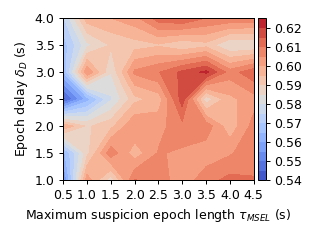

In [19]:
plt.figure(figsize=(3.5,2.625))
plt.contourf(msels, eds, aa, 15, cmap=plt.cm.coolwarm)
plt.xticks(msels, msels)
plt.yticks(eds, eds)
plt.xlabel('Maximum suspicion epoch length $ \\tau_{MSEL}$ (s)')
plt.ylabel('Epoch delay $\\delta_D$ (s)')
cb = plt.colorbar(fraction=0.046, pad=0.02) # label='Validation accuracy' orientation="horizontal",
# plt.colorbar(fraction=0.036, pad=0.02) # label='Validation accuracy'
# cb.ax.xaxis.set_ticks_position('top')
plt.tight_layout()
plt.show()